In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
total_ghg = 'ghg-emissions_total without LUCF.csv'
total_ghg = pd.read_csv(total_ghg)

In [3]:
total_ghg.head(10)

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,MtCO2e,3238.86,3386.24,3515.19,3744.91,3904.48,4307.87,4328.95,4324.41,...,11089.79,11374.80,11861.84,11940.74,11804.70,11773.34,12014.20,12524.34,12732.25,12942.87
1,United States,MtCO2e,5855.54,5810.38,5894.66,6006.01,6100.51,6168.77,6338.95,6600.80,...,6254.96,6036.58,6177.42,6224.27,6112.06,6003.24,5947.84,6154.65,6039.74,5505.18
2,India,MtCO2e,1237.96,1292.41,1317.32,1350.48,1395.75,1462.17,1514.07,1574.52,...,2681.72,2832.70,2900.89,3083.57,3104.05,3147.64,3269.58,3436.07,3412.42,3200.82
3,Russia,MtCO2e,2969.78,2908.88,2750.28,2558.24,2323.06,2246.01,2190.94,2054.13,...,2340.37,2316.61,2280.31,2264.92,2249.22,2246.73,2282.28,2371.54,2419.13,2331.48
4,Japan,MtCO2e,1181.86,1197.30,1210.39,1203.80,1261.54,1276.85,1291.67,1279.69,...,1292.83,1336.34,1352.16,1305.37,1268.75,1258.30,1241.56,1198.18,1157.54,1094.56
5,Brazil,MtCO2e,592.50,613.62,623.61,635.00,651.87,678.65,682.10,711.14,...,1019.42,1058.60,1089.19,1127.55,1105.48,1069.58,1085.92,1054.18,1069.92,1064.71
6,Indonesia,MtCO2e,468.36,489.48,510.55,526.83,548.35,583.64,605.94,631.41,...,858.23,863.28,829.24,873.79,874.60,870.04,914.63,980.51,1020.91,976.49
7,Iran,MtCO2e,320.86,348.26,370.07,377.19,408.45,418.03,433.20,450.84,...,765.90,765.33,786.88,812.67,812.28,849.36,878.97,891.70,856.66,844.65
8,Saudi Arabia,MtCO2e,239.71,272.53,290.13,287.76,287.33,286.20,301.64,307.80,...,596.45,632.99,649.10,692.68,726.21,734.31,728.09,715.86,720.67,712.59
9,Germany,MtCO2e,1129.74,1102.40,1057.02,1048.50,1038.94,1034.57,1064.64,1027.51,...,852.01,865.21,881.58,840.76,845.44,848.45,831.16,802.49,751.65,692.75


Need to remove:
    - Rows 193 & 194

In [4]:
rows_to_drop = [193,194]
total_ghg = total_ghg.drop(rows_to_drop)

In [5]:
# check for missing values
total_ghg.isna().sum()

Country/Region    0
unit              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
dtype: int64

In [6]:
# check data type of values
total_ghg.dtypes

Country/Region     object
unit               object
1990               object
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
dtype: object

In [7]:
# check why 1990 is an object type 
# Check the csv file, Namibia only one with value == false, replace with value in 1991 for convenience
total_ghg[total_ghg['Country/Region'] == 'Namibia']

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
129,Namibia,MtCO2e,false,9.25,9.21,9.18,9.38,9.48,9.36,9.2,...,17.62,19.17,12.35,11.6,11.66,12.32,12.38,11.62,10.79,13.56


In [8]:
total_ghg.loc[total_ghg['Country/Region'] == 'Namibia', '1990'] = np.where(
    total_ghg.loc[total_ghg['Country/Region'] == 'Namibia', '1990'] == 'false',
    total_ghg.loc[total_ghg['Country/Region'] == 'Namibia', '1991'],
    total_ghg.loc[total_ghg['Country/Region'] == 'Namibia', '1990']
)

In [9]:
total_ghg[total_ghg['Country/Region'] == 'Namibia']

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
129,Namibia,MtCO2e,9.25,9.25,9.21,9.18,9.38,9.48,9.36,9.2,...,17.62,19.17,12.35,11.6,11.66,12.32,12.38,11.62,10.79,13.56


In [10]:
total_ghg['1990'] = total_ghg['1990'].astype('float64')

In [11]:
total_ghg.dtypes
# Changed datatype to appropriate form

Country/Region     object
unit               object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
dtype: object

In [12]:
# Create new column where we can find out which countries have a net increase/decrease of GHG emission since 1990 to 2020 
total_ghg['Change from 1990 to latest reported year (%)'] = ((total_ghg['2020'] - total_ghg['1990'])/total_ghg['1990']) *100

In [13]:
total_ghg['Change from 1990 to latest reported year (%)']

0      299.611900
1       -5.983394
2      158.556012
3      -21.493175
4       -7.386662
          ...    
188    125.000000
189     40.000000
190    -61.538462
191      0.000000
192      0.000000
Name: Change from 1990 to latest reported year (%), Length: 193, dtype: float64

In [14]:
total_ghg.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change from 1990 to latest reported year (%)
0,China,MtCO2e,3238.86,3386.24,3515.19,3744.91,3904.48,4307.87,4328.95,4324.41,...,11374.80,11861.84,11940.74,11804.70,11773.34,12014.20,12524.34,12732.25,12942.87,299.611900
1,United States,MtCO2e,5855.54,5810.38,5894.66,6006.01,6100.51,6168.77,6338.95,6600.80,...,6036.58,6177.42,6224.27,6112.06,6003.24,5947.84,6154.65,6039.74,5505.18,-5.983394
2,India,MtCO2e,1237.96,1292.41,1317.32,1350.48,1395.75,1462.17,1514.07,1574.52,...,2832.70,2900.89,3083.57,3104.05,3147.64,3269.58,3436.07,3412.42,3200.82,158.556012
3,Russia,MtCO2e,2969.78,2908.88,2750.28,2558.24,2323.06,2246.01,2190.94,2054.13,...,2316.61,2280.31,2264.92,2249.22,2246.73,2282.28,2371.54,2419.13,2331.48,-21.493175
4,Japan,MtCO2e,1181.86,1197.30,1210.39,1203.80,1261.54,1276.85,1291.67,1279.69,...,1336.34,1352.16,1305.37,1268.75,1258.30,1241.56,1198.18,1157.54,1094.56,-7.386662


In [15]:
# Convert change to 2 decimal place

# Dataframe is already arranged from largest to smallest for ghg emission in 2020
total_ghg

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change from 1990 to latest reported year (%)
0,China,MtCO2e,3238.86,3386.24,3515.19,3744.91,3904.48,4307.87,4328.95,4324.41,...,11374.80,11861.84,11940.74,11804.70,11773.34,12014.20,12524.34,12732.25,12942.87,299.611900
1,United States,MtCO2e,5855.54,5810.38,5894.66,6006.01,6100.51,6168.77,6338.95,6600.80,...,6036.58,6177.42,6224.27,6112.06,6003.24,5947.84,6154.65,6039.74,5505.18,-5.983394
2,India,MtCO2e,1237.96,1292.41,1317.32,1350.48,1395.75,1462.17,1514.07,1574.52,...,2832.70,2900.89,3083.57,3104.05,3147.64,3269.58,3436.07,3412.42,3200.82,158.556012
3,Russia,MtCO2e,2969.78,2908.88,2750.28,2558.24,2323.06,2246.01,2190.94,2054.13,...,2316.61,2280.31,2264.92,2249.22,2246.73,2282.28,2371.54,2419.13,2331.48,-21.493175
4,Japan,MtCO2e,1181.86,1197.30,1210.39,1203.80,1261.54,1276.85,1291.67,1279.69,...,1336.34,1352.16,1305.37,1268.75,1258.30,1241.56,1198.18,1157.54,1094.56,-7.386662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Kiribati,MtCO2e,0.04,0.04,0.04,0.05,0.04,0.05,0.05,0.05,...,0.08,0.09,0.09,0.09,0.09,0.10,0.10,0.10,0.09,125.000000
189,Cook Islands,MtCO2e,0.05,0.05,0.05,0.06,0.06,0.06,0.07,0.07,...,0.10,0.10,0.10,0.09,0.09,0.10,0.10,0.10,0.07,40.000000
190,Nauru,MtCO2e,0.13,0.13,0.12,0.12,0.12,0.11,0.11,0.11,...,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.06,0.05,-61.538462
191,Tuvalu,MtCO2e,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.000000


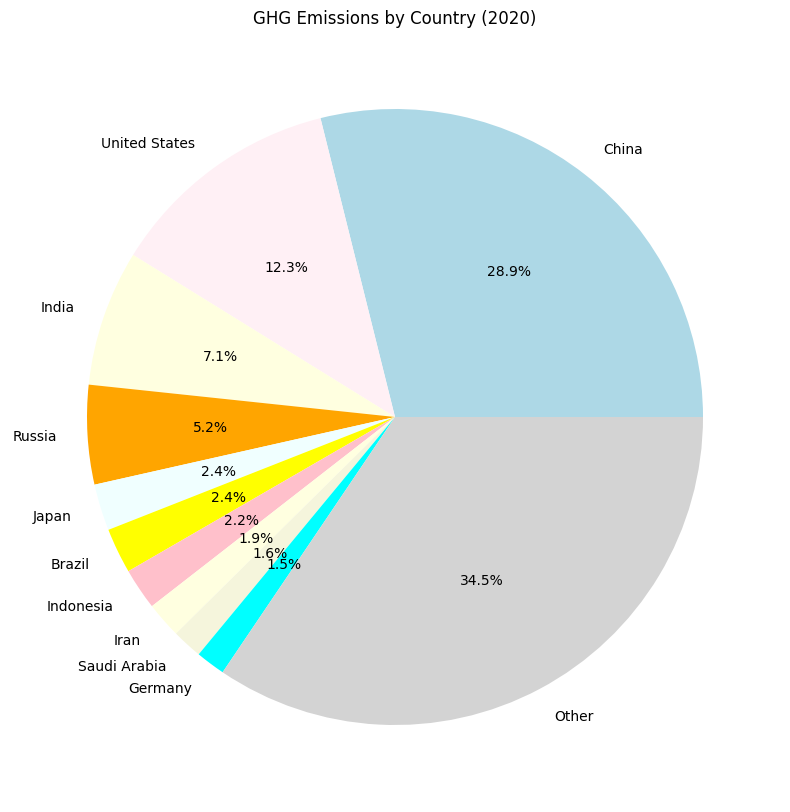

In [16]:
# Select the top 10 countries and their corresponding values
top_10_countries = total_ghg['Country/Region'].head(10)
top_10_values = total_ghg['2020'].head(10)

# Calculate the total value of the other countries
other_countries_value = total_ghg['2020'].sum() - top_10_values.sum()

# Prepare the labels for the pie chart
labels = top_10_countries.tolist()
labels.append('Other')

# Prepare the values for the pie chart
values = top_10_values.tolist()
values.append(other_countries_value)

# Define colors for the pie chart slices
top_10_colors = ['lightblue', 'lavenderblush', 'lightyellow', 'orange', 'azure', 'yellow', 'pink', 'lightyellow', 'beige', 'cyan']
other_color = 'lightgray'

# Create the pie chart for top 10 countries and other countries
plt.figure(figsize=(10, 10))  # Set the size of the figure
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=top_10_colors + [other_color])

# Add a title to the pie chart
plt.title('GHG Emissions by Country (2020)')

# Display the pie chart
plt.show()

In [17]:
# Observe for outliers for GHG Emission

Q1 = total_ghg['Change from 1990 to latest reported year (%)'].quantile(0.25)
Q3 = total_ghg['Change from 1990 to latest reported year (%)'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(round(IQR, 2))
print(round(lower_bound, 2))
print(round(upper_bound, 2))

# Identify outliers
outliers = total_ghg[(total_ghg['Change from 1990 to latest reported year (%)'] < lower_bound) | 
                     (total_ghg['Change from 1990 to latest reported year (%)'] > upper_bound)]

outliers_df = pd.DataFrame(outliers)
outliers_df[['Country/Region', '1990', '2020','Change from 1990 to latest reported year (%)']]

print('Minimum value: ', round(total_ghg['Change from 1990 to latest reported year (%)'].min(), 2))
print('Maximum value: ', total_ghg['Change from 1990 to latest reported year (%)'].max())
print('Mean value: ', round(total_ghg['Change from 1990 to latest reported year (%)'].mean(), 2))

146.66
-227.38
359.27
Minimum value:  -75.92
Maximum value:  5200.0
Mean value:  132.78


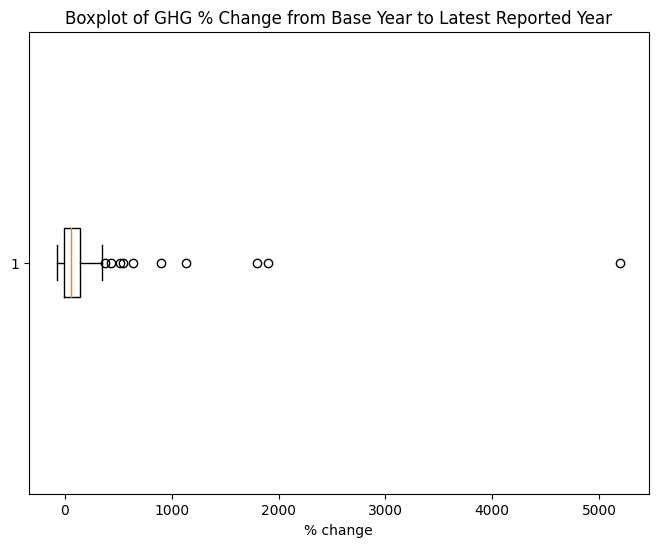

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(total_ghg['Change from 1990 to latest reported year (%)'], vert=False)
plt.xlabel('% change')
plt.title('Boxplot of GHG % Change from Base Year to Latest Reported Year')
plt.show()

# Load GHG/ GDP DataFrame

In [19]:
ghg_gdp = 'ghg-emissions_gdp.csv'

ghg_gdp = pd.read_csv(ghg_gdp)

In [20]:
ghg_gdp

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,tCO2e/ million $ GDP,8975.44,8832.74,8233.93,8420.62,6918.85,5864.66,5011.82,4497.08,...,1468.55,1333.16,1239.43,1139.85,1067.18,1048.08,975.94,901.37,891.62,881.21
1,United States,tCO2e/ million $ GDP,981.96,943.53,904.04,875.70,837.15,807.46,785.19,769.54,...,400.97,371.39,366.76,354.65,335.72,321.11,305.34,299.83,282.59,263.48
2,India,tCO2e/ million $ GDP,3856.83,4784.85,4570.73,4835.30,4264.76,4058.42,3853.61,3786.10,...,1471.01,1549.93,1562.37,1512.20,1475.60,1371.64,1233.12,1271.24,1205.14,1199.85
3,Russia,tCO2e/ million $ GDP,5746.32,5616.01,5975.09,5879.89,5880.01,5678.37,5593.06,5072.83,...,1143.92,1049.05,994.70,1099.88,1649.62,1759.67,1449.81,1430.94,1428.81,1566.52
4,Japan,tCO2e/ million $ GDP,377.25,334.03,309.66,270.26,252.37,230.25,262.35,284.85,...,207.41,213.05,259.42,266.56,285.44,251.47,251.80,237.84,225.94,217.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Nauru,tCO2e/ million $ GDP,false,false,false,false,false,false,false,false,...,682.25,486.23,531.94,532.74,690.12,582.10,562.31,480.78,498.32,412.89
191,Tuvalu,tCO2e/ million $ GDP,1921.38,1923.44,1919.82,1953.81,1804.75,1838.58,1486.78,1525.78,...,594.15,585.41,571.73,568.61,582.13,516.48,486.15,488.40,438.25,394.93
192,Niue,tCO2e/ million $ GDP,false,false,false,false,false,false,false,false,...,false,false,false,false,false,false,false,false,false,false
193,Data source,Climate Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 

In [21]:
rows_to_drop = [193,194]
ghg_gdp_drop = ghg_gdp.drop(rows_to_drop)

In [22]:
for i in range(2, ghg_gdp_drop.shape[1]):  # Iterate over the columns starting from the 3rd column
    mask = (ghg_gdp_drop.iloc[:, i] == 'false')
    ghg_gdp_drop.loc[mask, ghg_gdp_drop.columns[i]] = ghg_gdp_drop.iloc[:, i+1:].apply(lambda x: next((val for val in x if val != 'false'), np.nan), axis=1)

# Output the modified DataFrame
ghg_gdp_drop


,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,tCO2e/ million $ GDP,8975.44,8832.74,8233.93,8420.62,6918.85,5864.66,5011.82,4497.08,...,1468.55,1333.16,1239.43,1139.85,1067.18,1048.08,975.94,901.37,891.62,881.21
1,United States,tCO2e/ million $ GDP,981.96,943.53,904.04,875.70,837.15,807.46,785.19,769.54,...,400.97,371.39,366.76,354.65,335.72,321.11,305.34,299.83,282.59,263.48
2,India,tCO2e/ million $ GDP,3856.83,4784.85,4570.73,4835.30,4264.76,4058.42,3853.61,3786.10,...,1471.01,1549.93,1562.37,1512.20,1475.60,1371.64,1233.12,1271.24,1205.14,1199.85
3,Russia,tCO2e/ million $ GDP,5746.32,5616.01,5975.09,5879.89,5880.01,5678.37,5593.06,5072.83,...,1143.92,1049.05,994.70,1099.88,1649.62,1759.67,1449.81,1430.94,1428.81,1566.52
4,Japan,tCO2e/ million $ GDP,377.25,334.03,309.66,270.26,252.37,230.25,262.35,284.85,...,207.41,213.05,259.42,266.56,285.44,251.47,251.80,237.84,225.94,217.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Kiribati,tCO2e/ million $ GDP,1006.59,861.65,873.85,976.56,808.99,841.85,787.93,754.62,...,440.52,442.00,489.53,491.05,519.83,478.15,542.52,526.71,587.05,489.58
189,Cook Islands,tCO2e/ million $ GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Nauru,tCO2e/ million $ GDP,1000.83,1000.83,1000.83,1000.83,1000.83,1000.83,1000.83,1000.83,...,682.25,486.23,531.94,532.74,690.12,582.10,562.31,480.78,498.32,412.89
191,Tuvalu,tCO2e/ million $ GDP,1921.38,1923.44,1919.82,1953.81,1804.75,1838.58,1486.78,1525.78,...,594.15,585.41,571.73,568.61,582.13,516.48,486.15,488.40,438.25,394.93


In [23]:
ghg_gdp_drop.dtypes

Country/Region    object
unit              object
1990              object
1991              object
1992              object
1993              object
1994              object
1995              object
1996              object
1997              object
1998              object
1999              object
2000              object
2001              object
2002              object
2003              object
2004              object
2005              object
2006              object
2007              object
2008              object
2009              object
2010              object
2011              object
2012              object
2013              object
2014              object
2015              object
2016              object
2017              object
2018              object
2019              object
2020              object
dtype: object

In [24]:
ghg_gdp_drop['2020'] = ghg_gdp_drop['2020'].replace(np.nan, 0).astype('float64')
ghg_gdp_drop['1990'] = ghg_gdp_drop['1990'].replace(np.nan, 0).astype('float64')
ghg_gdp_new = ghg_gdp_drop[['Country/Region', 'unit', '1990', '2020']].copy()

In [25]:
ghg_gdp_new

,Country/Region,unit,1990,2020
0,China,tCO2e/ million $ GDP,8975.44,881.21
1,United States,tCO2e/ million $ GDP,981.96,263.48
2,India,tCO2e/ million $ GDP,3856.83,1199.85
3,Russia,tCO2e/ million $ GDP,5746.32,1566.52
4,Japan,tCO2e/ million $ GDP,377.25,217.17
...,...,...,...,...
188,Kiribati,tCO2e/ million $ GDP,1006.59,489.58
189,Cook Islands,tCO2e/ million $ GDP,0.00,0.00
190,Nauru,tCO2e/ million $ GDP,1000.83,412.89
191,Tuvalu,tCO2e/ million $ GDP,1921.38,394.93


In [26]:
ghg_gdp_new = ghg_gdp_new.rename(columns={'1990': 'base_year'})

ghg_gdp_new

,Country/Region,unit,base_year,2020
0,China,tCO2e/ million $ GDP,8975.44,881.21
1,United States,tCO2e/ million $ GDP,981.96,263.48
2,India,tCO2e/ million $ GDP,3856.83,1199.85
3,Russia,tCO2e/ million $ GDP,5746.32,1566.52
4,Japan,tCO2e/ million $ GDP,377.25,217.17
...,...,...,...,...
188,Kiribati,tCO2e/ million $ GDP,1006.59,489.58
189,Cook Islands,tCO2e/ million $ GDP,0.00,0.00
190,Nauru,tCO2e/ million $ GDP,1000.83,412.89
191,Tuvalu,tCO2e/ million $ GDP,1921.38,394.93


In [27]:
ghg_gdp_new['GDP_per_million_2020'] = (total_ghg['2020']* 10**6)/ghg_gdp_new['2020']
ghg_gdp_new['GDP_per_million_base_year'] = (total_ghg['1990']* 10**6)/ghg_gdp_new['base_year']

ghg_gdp_new['GDP_per_million change from Base year to 2020 (%)'] = ((ghg_gdp_new['GDP_per_million_2020'] - ghg_gdp_new['GDP_per_million_base_year'])/ghg_gdp_new['GDP_per_million_base_year']) *100
ghg_gdp_new['GDP_per_million change from Base year to 2020 (%)'] = ghg_gdp_new['GDP_per_million change from Base year to 2020 (%)'].replace(np.nan, 0).astype('float64')
ghg_gdp_new

,Country/Region,unit,base_year,2020,GDP_per_million_2020,GDP_per_million_base_year,GDP_per_million change from Base year to 2020 (%)
0,China,tCO2e/ million $ GDP,8975.44,881.21,1.468761e+07,3.608581e+05,3970.190574
1,United States,tCO2e/ million $ GDP,981.96,263.48,2.089411e+07,5.963115e+06,250.389202
2,India,tCO2e/ million $ GDP,3856.83,1199.85,2.667683e+06,3.209786e+05,731.109374
3,Russia,tCO2e/ million $ GDP,5746.32,1566.52,1.488318e+06,5.168142e+05,187.979305
4,Japan,tCO2e/ million $ GDP,377.25,217.17,5.040107e+06,3.132830e+06,60.880333
...,...,...,...,...,...,...,...
188,Kiribati,tCO2e/ million $ GDP,1006.59,489.58,1.838310e+02,3.973813e+01,362.606213
189,Cook Islands,tCO2e/ million $ GDP,0.00,0.00,inf,inf,0.000000
190,Nauru,tCO2e/ million $ GDP,1000.83,412.89,1.210976e+02,1.298922e+02,-6.770662
191,Tuvalu,tCO2e/ million $ GDP,1921.38,394.93,5.064189e+01,1.040919e+01,386.511534


In [28]:
# Take note that total_ghg unit is in Megaton 10*6 while GDP and Capital are in ton

ghg_gdp_new = ghg_gdp_new.replace([np.inf, -np.inf], 0)
ghg_gdp_new['emission_2020'] = total_ghg['2020']
ghg_gdp_new['emission_base_year'] = total_ghg['1990']
ghg_gdp_new = ghg_gdp_new.drop('unit', axis=1)
ghg_gdp_new = ghg_gdp_new.rename(columns={'Base year':'tCO2/million_$GDP_base_year'})
ghg_gdp_new = ghg_gdp_new.rename(columns={'2020': 'tCO2/million_$GDP_2020'})

In [29]:
countries_dict = {
    'Albania': 'NDC_partnership',
    'Antigua and Barbuda': 'NDC_partnership',
    'Argentina': 'NDC_partnership',
    'Armenia': 'NDC_partnership',
    'Australia': 'NDC_partnership',
    'Bahamas': 'NDC_partnership',
    'Bangladesh': 'NDC_partnership',
    'Belgium': 'NDC_partnership',
    'Belize': 'NDC_partnership',
    'Benin': 'NDC_partnership',
    'Bolivia': 'NDC_partnership',
    'Brazil': 'NDC_partnership',
    'Burkina Faso': 'NDC_partnership',
    'Burundi': 'NDC_partnership',
    'Cambodia': 'NDC_partnership',
    'Cameroon': 'NDC_partnership',
    'Canada': 'NDC_partnership',
    'Central African Republic': 'NDC_partnership',
    'Chad': 'NDC_partnership',
    'Chile': 'NDC_partnership',
    'Colombia': 'NDC_partnership',
    'Costa Rica': 'NDC_partnership',
    'Cuba': 'NDC_partnership',
    "Côte d'Ivoire": 'NDC_partnership',
    'Democratic Republic of the Congo': 'NDC_partnership',
    'Denmark': 'NDC_partnership',
    'Dominica': 'NDC_partnership',
    'Dominican Republic': 'NDC_partnership',
    'Ecuador': 'NDC_partnership',
    'El Salvador': 'NDC_partnership',
    'Equatorial Guinea': 'NDC_partnership',
    'Eswatini': 'NDC_partnership',
    'Ethiopia': 'NDC_partnership',
    'European Union (27)': 'NDC_partnership',
    'Fiji': 'NDC_partnership',
    'Finland': 'NDC_partnership',
    'France': 'NDC_partnership',
    'Gabon': 'NDC_partnership',
    'Georgia': 'NDC_partnership',
    'Germany': 'NDC_partnership',
    'Ghana': 'NDC_partnership',
    'Grenada': 'NDC_partnership',
    'Guatemala': 'NDC_partnership',
    'Guinea': 'NDC_partnership',
    'Guinea-Bissau': 'NDC_partnership',
    'Haiti': 'NDC_partnership',
    'Honduras': 'NDC_partnership',
    'Indonesia': 'NDC_partnership',
    'Iraq': 'NDC_partnership',
    'Ireland': 'NDC_partnership',
    'Italy': 'NDC_partnership',
    'Jamaica': 'NDC_partnership',
    'Japan': 'NDC_partnership',
    'Jordan': 'NDC_partnership',
    'Kenya': 'NDC_partnership',
    'Kyrgyzstan': 'NDC_partnership',
    'Laos': 'NDC_partnership',
    'Lebanon': 'NDC_partnership',
    'Lesotho': 'NDC_partnership',
    'Liberia': 'NDC_partnership',
    'Malawi': 'NDC_partnership',
    'Maldives': 'NDC_partnership',
    'Mali': 'NDC_partnership',
    'Marshall Islands': 'NDC_partnership',
    'Mauritania': 'NDC_partnership',
    'Mexico': 'NDC_partnership',
    'Micronesia': 'NDC_partnership',
    'Mongolia': 'NDC_partnership',
    'Morocco': 'NDC_partnership',
    'Mozambique': 'NDC_partnership',
    'Myanmar': 'NDC_partnership',
    'Namibia': 'NDC_partnership',
    'Nauru': 'NDC_partnership',
    'Nepal': 'NDC_partnership',
    'Netherlands': 'NDC_partnership',
    'New Zealand': 'NDC_partnership',
    'Nicaragua': 'NDC_partnership',
    'Niger': 'NDC_partnership',
    'Nigeria': 'NDC_partnership',
    'Macedonia': 'NDC_partnership',
    'Norway': 'NDC_partnership',
    'Pakistan': 'NDC_partnership',
    'Panama': 'NDC_partnership',
    'Papua New Guinea': 'NDC_partnership',
    'Paraguay': 'NDC_partnership',
    'Peru': 'NDC_partnership',
    'Philippines': 'NDC_partnership',
    'Republic of Congo': 'NDC_partnership',
    'Rwanda': 'NDC_partnership',
    'Saint Kitts and Nevis': 'NDC_partnership',
    'Saint Lucia': 'NDC_partnership',
    'Saint Vincent and the Grenadines': 'NDC_partnership',
    'Samoa': 'NDC_partnership',
    'Sao Tome and Principe': 'NDC_partnership',
    'Senegal': 'NDC_partnership',
    'Seychelles': 'NDC_partnership',
    'Sierra Leone': 'NDC_partnership',
    'Singapore': 'NDC_partnership',
    'Somalia': 'NDC_partnership',
    'South Africa': 'NDC_partnership',
    'Spain': 'NDC_partnership',
    'Sudan': 'NDC_partnership',
    'Suriname': 'NDC_partnership',
    'Sweden': 'NDC_partnership',
    'Tanzania': 'NDC_partnership',
    'Tajikistan': 'NDC_partnership',
    'Thailand': 'NDC_partnership',
    'Gambia': 'NDC_partnership',
    'Togo': 'NDC_partnership',
    'Tonga': 'NDC_partnership',
    'Tunisia': 'NDC_partnership',
    'Uganda': 'NDC_partnership',
    'Ukraine': 'NDC_partnership',
    'United Kingdom': 'NDC_partnership',
    'United States': 'NDC_partnership',
    'Uruguay': 'NDC_partnership',
    'Vanuatu': 'NDC_partnership',
    'Vietnam': 'NDC_partnership',
    'Zambia': 'NDC_partnership',
    'Zimbabwe': 'NDC_partnership',
    'Montenegro': 'NDC_partnership' }

In [30]:
ghg_gdp_new

,Country/Region,base_year,tCO2/million_$GDP_2020,GDP_per_million_2020,GDP_per_million_base_year,GDP_per_million change from Base year to 2020 (%),emission_2020,emission_base_year
0,China,8975.44,881.21,1.468761e+07,3.608581e+05,3970.190574,12942.87,3238.86
1,United States,981.96,263.48,2.089411e+07,5.963115e+06,250.389202,5505.18,5855.54
2,India,3856.83,1199.85,2.667683e+06,3.209786e+05,731.109374,3200.82,1237.96
3,Russia,5746.32,1566.52,1.488318e+06,5.168142e+05,187.979305,2331.48,2969.78
4,Japan,377.25,217.17,5.040107e+06,3.132830e+06,60.880333,1094.56,1181.86
...,...,...,...,...,...,...,...,...
188,Kiribati,1006.59,489.58,1.838310e+02,3.973813e+01,362.606213,0.09,0.04
189,Cook Islands,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.07,0.05
190,Nauru,1000.83,412.89,1.210976e+02,1.298922e+02,-6.770662,0.05,0.13
191,Tuvalu,1921.38,394.93,5.064189e+01,1.040919e+01,386.511534,0.02,0.02


In [31]:
keys_list = list(countries_dict.keys())

print(keys_list)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Bahamas', 'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'European Union (27)', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mexico', 'Micronesia', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Macedonia', 'No

In [32]:
# Mapping of NDC_partnership to the dataframe

membership = ['NDC_partnership' if country in countries_dict else '' for country in ghg_gdp_new['Country/Region']]
ghg_gdp_new['NDC_partnership'] = [1 if mem == 'NDC_partnership' else 0 for mem in membership]
ghg_gdp_new

,Country/Region,base_year,tCO2/million_$GDP_2020,GDP_per_million_2020,GDP_per_million_base_year,GDP_per_million change from Base year to 2020 (%),emission_2020,emission_base_year,NDC_partnership
0,China,8975.44,881.21,1.468761e+07,3.608581e+05,3970.190574,12942.87,3238.86,0
1,United States,981.96,263.48,2.089411e+07,5.963115e+06,250.389202,5505.18,5855.54,1
2,India,3856.83,1199.85,2.667683e+06,3.209786e+05,731.109374,3200.82,1237.96,0
3,Russia,5746.32,1566.52,1.488318e+06,5.168142e+05,187.979305,2331.48,2969.78,0
4,Japan,377.25,217.17,5.040107e+06,3.132830e+06,60.880333,1094.56,1181.86,1
...,...,...,...,...,...,...,...,...,...
188,Kiribati,1006.59,489.58,1.838310e+02,3.973813e+01,362.606213,0.09,0.04,0
189,Cook Islands,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.07,0.05,0
190,Nauru,1000.83,412.89,1.210976e+02,1.298922e+02,-6.770662,0.05,0.13,1
191,Tuvalu,1921.38,394.93,5.064189e+01,1.040919e+01,386.511534,0.02,0.02,0


In [33]:
ghg_capita = 'ghg-emissions_per_capita.csv'
ghg_capita = pd.read_csv(ghg_capita)
rows_to_drop = [193,194]
ghg_capita = ghg_capita.drop(rows_to_drop)


# replace Years with false values with the values where there is a value in the subsequent Year column

for i in range(2, ghg_capita.shape[1]):  # Iterate over the columns starting from the 3rd column
    mask = (ghg_capita.iloc[:, i] == 'false')
    ghg_capita.loc[mask, ghg_capita.columns[i]] = ghg_capita.iloc[:, i+1:].apply(lambda x: next((val for val in x if val != 'false'), np.nan), axis=1)

ghg_capita

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,tCO2e per capita,2.85,2.94,3.02,3.18,3.28,3.58,3.56,3.52,...,8.24,8.40,8.70,8.70,8.55,8.48,8.60,8.93,9.04,9.17
1,United States,tCO2e per capita,23.46,22.97,22.98,23.11,23.18,23.17,23.53,24.21,...,20.07,19.23,19.55,19.55,19.06,18.58,18.29,18.83,18.40,16.61
2,India,tCO2e per capita,1.42,1.45,1.45,1.46,1.48,1.52,1.54,1.57,...,2.14,2.24,2.26,2.38,2.37,2.38,2.44,2.54,2.50,2.32
3,Russia,tCO2e per capita,20.07,19.60,18.52,17.23,15.65,15.14,14.79,13.89,...,16.37,16.18,15.89,15.75,15.61,15.57,15.79,16.41,16.75,16.18
4,Japan,tCO2e per capita,9.57,9.66,9.73,9.64,10.08,10.18,10.27,10.15,...,10.11,10.47,10.61,10.26,9.98,9.90,9.78,9.45,9.14,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Kiribati,tCO2e per capita,0.55,0.56,0.56,0.61,0.58,0.61,0.66,0.64,...,0.76,0.79,0.84,0.80,0.80,0.76,0.89,0.89,0.89,0.74
189,Cook Islands,tCO2e per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Nauru,tCO2e per capita,13.70,13.38,12.44,11.54,11.02,10.61,9.97,10.04,...,4.48,4.65,5.13,5.42,5.76,5.54,5.81,5.58,5.50,4.37
191,Tuvalu,tCO2e per capita,1.90,2.00,2.05,2.05,2.12,2.18,1.97,2.08,...,2.19,2.14,2.04,2.01,1.93,1.91,1.93,2.03,2.04,1.84


In [34]:
ghg_capita['2020'] = ghg_capita['2020'].replace(np.nan, 0).astype('float64')
ghg_capita['1990'] = ghg_capita['1990'].replace(np.nan, 0).astype('float64')
ghg_capita_new = ghg_capita[['Country/Region', 'unit', '1990', '2020']].copy()

In [35]:
ghg_capita_new.columns

Index(['Country/Region', 'unit', '1990', '2020'], dtype='object')

In [36]:
ghg_capita_new

,Country/Region,unit,1990,2020
0,China,tCO2e per capita,2.85,9.17
1,United States,tCO2e per capita,23.46,16.61
2,India,tCO2e per capita,1.42,2.32
3,Russia,tCO2e per capita,20.07,16.18
4,Japan,tCO2e per capita,9.57,8.67
...,...,...,...,...
188,Kiribati,tCO2e per capita,0.55,0.74
189,Cook Islands,tCO2e per capita,0.00,0.00
190,Nauru,tCO2e per capita,13.70,4.37
191,Tuvalu,tCO2e per capita,1.90,1.84


- What is the role of capital in a country?
In economics, capital refers to the assets—physical tools, plants, and equipment—that allow for increased work productivity. By increasing productivity through improved capital equipment, more goods can be produced and the standard of living can rise.

In [37]:
ghg_capita_new['capita_2020'] =  ((ghg_capita_new['2020']) / (10**6))
ghg_capita_new['capita_1990'] =  ((ghg_capita_new['1990']) / (10**6))
ghg_capita_new = ghg_capita_new.replace([np.inf, -np.inf], 0)

In [38]:
ghg_capita_new = ghg_capita_new.rename(columns={'capita_1990': 'base_year_capita'})
ghg_capita_new['Capita change from Base year to 2020 (%)'] = ((ghg_capita_new['capita_2020'] - ghg_capita_new['base_year_capita'])/ ghg_capita_new['base_year_capita'])
ghg_capita_new['Capita change from Base year to 2020 (%)'] = ghg_capita_new['Capita change from Base year to 2020 (%)'].replace(np.nan, 0).astype('float64')


In [39]:
ghg_capita_new = ghg_capita_new.drop('unit', axis=1)
ghg_capita_new


,Country/Region,1990,2020,capita_2020,base_year_capita,Capita change from Base year to 2020 (%)
0,China,2.85,9.17,9.170000e-06,2.850000e-06,2.217544
1,United States,23.46,16.61,1.661000e-05,2.346000e-05,-0.291986
2,India,1.42,2.32,2.320000e-06,1.420000e-06,0.633803
3,Russia,20.07,16.18,1.618000e-05,2.007000e-05,-0.193822
4,Japan,9.57,8.67,8.670000e-06,9.570000e-06,-0.094044
...,...,...,...,...,...,...
188,Kiribati,0.55,0.74,7.400000e-07,5.500000e-07,0.345455
189,Cook Islands,0.00,0.00,0.000000e+00,0.000000e+00,0.000000
190,Nauru,13.70,4.37,4.370000e-06,1.370000e-05,-0.681022
191,Tuvalu,1.90,1.84,1.840000e-06,1.900000e-06,-0.031579


In [40]:
columns = ['Country/Region', 'Change from 1990 to latest reported year (%)' ]

total_ghg_subset = total_ghg[columns]
total_ghg_subset = total_ghg_subset.rename(columns = {'Change from 1990 to latest reported year (%)':'Emission Change from Base year to 2020 (%)'})
total_ghg_subset

,Country/Region,Emission Change from Base year to 2020 (%)
0,China,299.611900
1,United States,-5.983394
2,India,158.556012
3,Russia,-21.493175
4,Japan,-7.386662
...,...,...
188,Kiribati,125.000000
189,Cook Islands,40.000000
190,Nauru,-61.538462
191,Tuvalu,0.000000


In [41]:
ghg_combined = total_ghg_subset.merge(ghg_capita_new, on='Country/Region')
ghg_combined = ghg_combined.merge(ghg_gdp_new, on='Country/Region')
ghg_combined

,Country/Region,Emission Change from Base year to 2020 (%),1990,2020,capita_2020,base_year_capita,Capita change from Base year to 2020 (%),base_year,tCO2/million_$GDP_2020,GDP_per_million_2020,GDP_per_million_base_year,GDP_per_million change from Base year to 2020 (%),emission_2020,emission_base_year,NDC_partnership
0,China,299.611900,2.85,9.17,9.170000e-06,2.850000e-06,2.217544,8975.44,881.21,1.468761e+07,3.608581e+05,3970.190574,12942.87,3238.86,0
1,United States,-5.983394,23.46,16.61,1.661000e-05,2.346000e-05,-0.291986,981.96,263.48,2.089411e+07,5.963115e+06,250.389202,5505.18,5855.54,1
2,India,158.556012,1.42,2.32,2.320000e-06,1.420000e-06,0.633803,3856.83,1199.85,2.667683e+06,3.209786e+05,731.109374,3200.82,1237.96,0
3,Russia,-21.493175,20.07,16.18,1.618000e-05,2.007000e-05,-0.193822,5746.32,1566.52,1.488318e+06,5.168142e+05,187.979305,2331.48,2969.78,0
4,Japan,-7.386662,9.57,8.67,8.670000e-06,9.570000e-06,-0.094044,377.25,217.17,5.040107e+06,3.132830e+06,60.880333,1094.56,1181.86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Kiribati,125.000000,0.55,0.74,7.400000e-07,5.500000e-07,0.345455,1006.59,489.58,1.838310e+02,3.973813e+01,362.606213,0.09,0.04,0
189,Cook Islands,40.000000,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.00,0.00,0.000000e+00,0.000000e+00,0.000000,0.07,0.05,0
190,Nauru,-61.538462,13.70,4.37,4.370000e-06,1.370000e-05,-0.681022,1000.83,412.89,1.210976e+02,1.298922e+02,-6.770662,0.05,0.13,1
191,Tuvalu,0.000000,1.90,1.84,1.840000e-06,1.900000e-06,-0.031579,1921.38,394.93,5.064189e+01,1.040919e+01,386.511534,0.02,0.02,0


In [42]:
col_to_use = ['Capita change from Base year to 2020 (%)', 'GDP_per_million change from Base year to 2020 (%)', 'Emission Change from Base year to 2020 (%)']
ghg_combined_changes = ghg_combined[col_to_use]
ghg_combined_changes.corr()

,Capita change from Base year to 2020 (%),GDP_per_million change from Base year to 2020 (%),Emission Change from Base year to 2020 (%)
Capita change from Base year to 2020 (%),1.000000,0.546635,0.836307
GDP_per_million change from Base year to 2020 (%),0.546635,1.000000,0.757787
Emission Change from Base year to 2020 (%),0.836307,0.757787,1.000000


In [43]:
# Creating Binary columns
ghg_combined['Emission_class'] = ghg_combined['Emission Change from Base year to 2020 (%)'].apply(lambda x: 1 if x > 0 else 0)
ghg_combined['Capita_class'] = ghg_combined['Capita change from Base year to 2020 (%)'].apply(lambda x: 1 if x > 0 else 0)
ghg_combined['GDP_class'] = ghg_combined['GDP_per_million change from Base year to 2020 (%)'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
col_to_use = ['Country/Region','NDC_partnership', 'Emission_class', 'Capita_class', 'GDP_class']
ghg_binary = ghg_combined[col_to_use]
ghg_binary

,Country/Region,NDC_partnership,Emission_class,Capita_class,GDP_class
0,China,0,1,1,1
1,United States,1,0,0,1
2,India,0,1,1,1
3,Russia,0,0,0,1
4,Japan,1,0,0,1
...,...,...,...,...,...
188,Kiribati,0,1,1,1
189,Cook Islands,0,1,0,0
190,Nauru,1,0,0,0
191,Tuvalu,0,0,0,1


In [45]:
ghg_binary['Capita_class'].value_counts()

0    103
1     90
Name: Capita_class, dtype: int64

# Hypothesis Testing does being NDC_partner mean decreased GHG emission?

In [46]:
# Perform the two-sample t-test
from scipy.stats import ttest_ind

ghg_partner = ghg_binary[ghg_binary['NDC_partnership'] == 1]['Emission_class']
ghg_non_partner = ghg_binary[ghg_binary['NDC_partnership'] == 0]['Emission_class']

t_stat, p_value = ttest_ind(ghg_partner, ghg_non_partner)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the Null Hypothesis (H0).")
    print("There is a significant difference in GHG emissions between NDC partner and non-partner.")
    if np.mean(ghg_partner) < np.mean(ghg_non_partner):
        print("Mean GHG emissions of NDC partner are lower than non-members.")
    else:
        print("Mean GHG emissions of NDC partner are higher than non-members.")
else:
    print("Fail to reject the Null Hypothesis (H0).")
    print("There is no significant difference in GHG emissions between NDC partner and non-partner.")

Reject the Null Hypothesis (H0).
There is a significant difference in GHG emissions between NDC partner and non-partner.
Mean GHG emissions of NDC partner are higher than non-members.


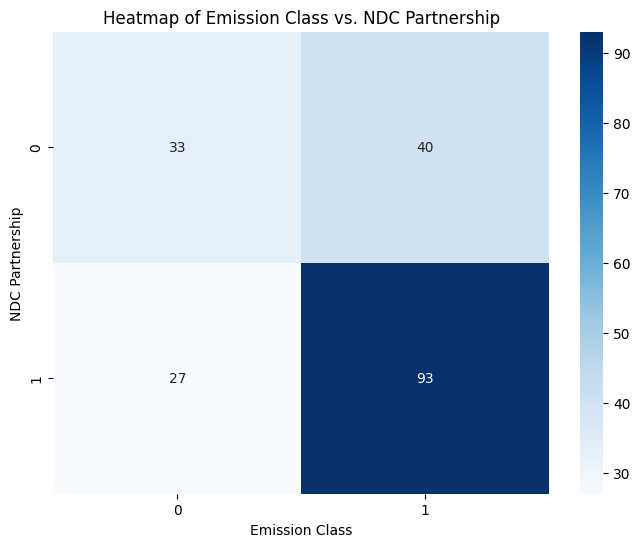

In [47]:
# Create a contingency table (cross-tabulation) for the two variables
cm = pd.crosstab(ghg_binary['NDC_partnership'], ghg_binary['Emission_class'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Emission Class')
plt.ylabel('NDC Partnership')
plt.title('Heatmap of Emission Class vs. NDC Partnership')

# Show the plot
plt.show()

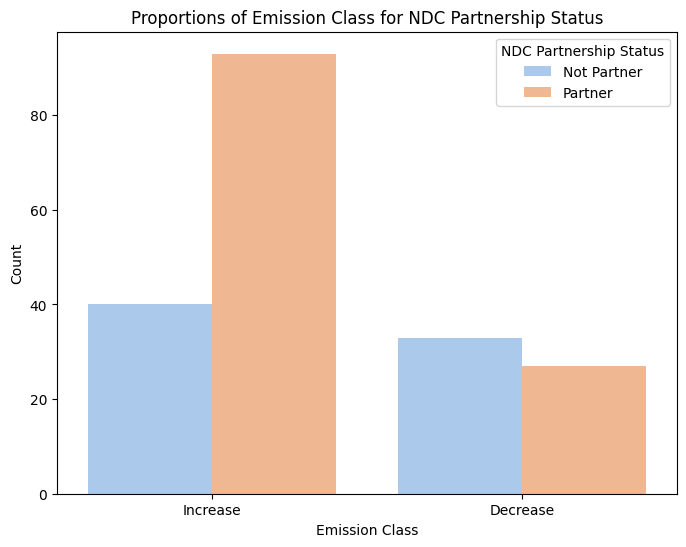

In [48]:
# Create a copy of the DataFrame
ghg_binary_copy = ghg_binary.copy()

# Map numerical values to meaningful labels for better visualization
ghg_binary_copy['NDC_partnership_status'] = ghg_binary_copy['NDC_partnership'].map({0: 'Not Partner', 1: 'Partner'})
ghg_binary_copy['Emission_class_status'] = ghg_binary_copy['Emission_class'].map({0: 'Decrease', 1: 'Increase'})

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Emission_class_status', hue='NDC_partnership_status', data=ghg_binary_copy, palette='pastel')

# Add labels and title
plt.xlabel('Emission Class')
plt.ylabel('Count')
plt.title('Proportions of Emission Class for NDC Partnership Status')

# Show the plot
plt.legend(title='NDC Partnership Status', loc='upper right')
plt.show()

# Test Null Hypothesis using non-binary emission class
- Results was as expected 

In [49]:
# Perform the two-sample t-test
from scipy.stats import ttest_ind

ghg_partner = ghg_combined[ghg_combined['NDC_partnership'] == 1]['Emission Change from Base year to 2020 (%)']
ghg_non_partner = ghg_combined[ghg_combined['NDC_partnership'] == 0]['Emission Change from Base year to 2020 (%)']

t_stat, p_value = ttest_ind(ghg_partner, ghg_non_partner)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the Null Hypothesis (H0).")
    print("There is a significant difference in GHG emissions between NDC partner and non-partner.")
    if np.mean(ghg_member) < np.mean(ghg_non_member):
        print("Mean GHG emissions of NDC partner are lower than non-members.")
    else:
        print("Mean GHG emissions of NDC partner are higher than non-members.")
else:
    print("Fail to reject the Null Hypothesis (H0).")
    print("There is no significant difference in GHG emissions between NDC partner and non-partner.")

Fail to reject the Null Hypothesis (H0).
There is no significant difference in GHG emissions between NDC partner and non-partner.


# Binary Logistic Regression using binary features

In [50]:
# Define the target variable
# 1 == increase, 0 == decrease

# Select the independent variable and target variable
predictor_col = ['NDC_partnership', 'Capita_class', 'GDP_class']

X = ghg_binary[predictor_col]
y = ghg_binary['Emission_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)
print(y_pred)
# Evaluate the model
print(metrics.classification_report(y_test, y_pred))

[1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.81      0.93      0.86        27

    accuracy                           0.79        39
   macro avg       0.78      0.71      0.73        39
weighted avg       0.79      0.79      0.78        39



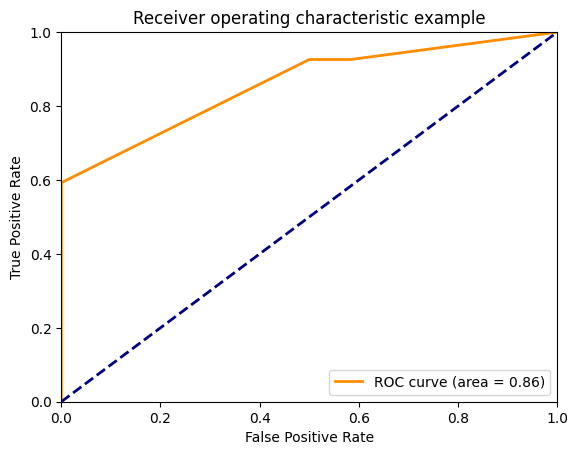

In [51]:
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

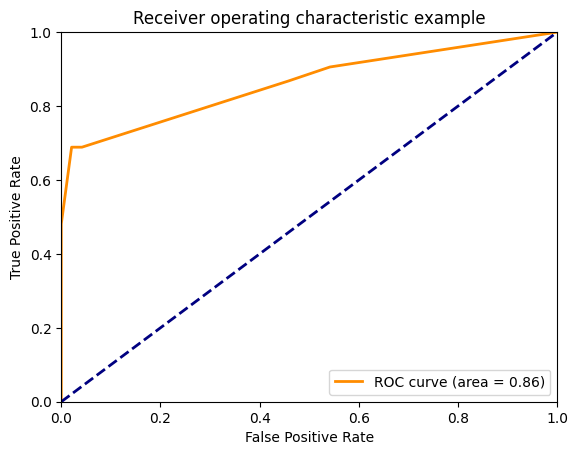

In [52]:
preds = logreg.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

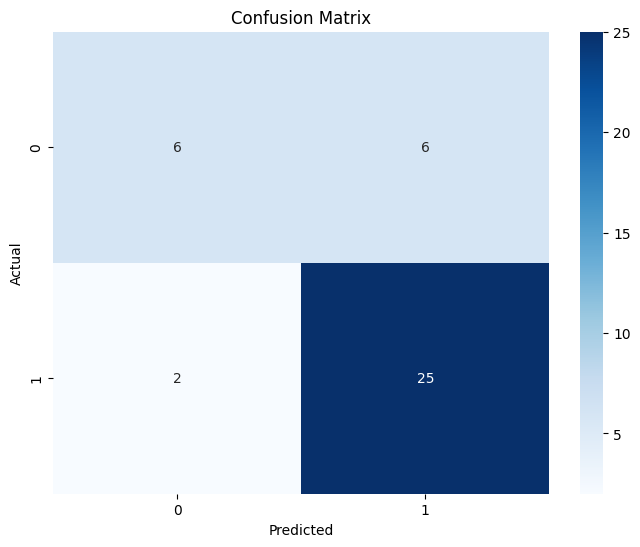

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.81      0.93      0.86        27

    accuracy                           0.79        39
   macro avg       0.78      0.71      0.73        39
weighted avg       0.79      0.79      0.78        39

Classification accuracy:  0.7949
Misclassification rate:  0.2051
Sensitivity:  0.9259
Specificity:  0.5
False positive rate:  0.5
Precision:  0.8065
Using 5-fold cross validation: 0.76 accuracy with a standard deviation of 0.05


In [53]:
# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = logreg.classes_

# Create a heat map of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print(metrics.classification_report(y_test, y_pred))

TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
misclassification_rate = (FP + FN) / float(TP+TN+FP+FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print('Classification accuracy: ', round(class_accuracy, 4))
print('Misclassification rate: ', round(misclassification_rate, 4))
print('Sensitivity: ', round(sensitivity, 4))
print('Specificity: ', round(specificity, 4))
print('False positive rate: ', round(false_positive_rate, 4))
print('Precision: ', round(precision, 4))

scores = cross_val_score(logreg, X_train, y_train, cv=5)

print("Using 5-fold cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Grid search for optimised parameter to compare the models

# SVC, Naive Beysian, Logistic

In [54]:
X = ghg_binary[predictor_col]
y = ghg_binary['Emission_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = svm.SVC(kernel = 'linear', C = 1000, gamma='scale', probability =True)

# SVC(kernal = 'linear, probability =True')

svm_model.fit(X_train, y_train)

SVC(C=1000, kernel='linear', probability=True)

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

GaussianNB()

In [56]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

# Create GridSearchCV object
# Edit the GridSearchCV based on error prompted
grid_search_logreg = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000), lr_params, cv=5)  # cv is the number of cross-validation folds

# Fit the data to perform grid search
grid_search_logreg.fit(X, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']})

In [57]:
lr_best_estimator = grid_search_logreg.best_estimator_
lr_best_score = grid_search_logreg.best_score_

print("Best estimator:", lr_best_estimator)
print("Best score:", lr_best_score)

Best estimator: LogisticRegression(C=1, max_iter=10000, solver='liblinear')
Best score: 0.7719298245614036


In [58]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
grid_search_svm = GridSearchCV(svm_model, svc_params, cv=5)  # cv is the number of cross-validation folds

# Fit the data to perform grid search
grid_search_svm.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(C=1000, kernel='linear', probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [59]:
# Get the best parameters and the best score
svm_best_estimator = grid_search_svm.best_estimator_
svm_best_score = grid_search_svm.best_score_

print("Best estimator:", svm_best_estimator)
print("Best score:", svm_best_score)

Best estimator: SVC(C=100, gamma=0.001, probability=True)
Best score: 0.7672064777327935


In [60]:
svm_model = svm.SVC(kernel = 'linear', C = 100, gamma= 0.001, probability = True)
svm_model.fit(X_train,y_train)

SVC(C=100, gamma=0.001, kernel='linear', probability=True)

In [61]:
logreg.penalty = 'l1'
logreg_model = LogisticRegression(C=1, max_iter=10000, solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, solver='liblinear')

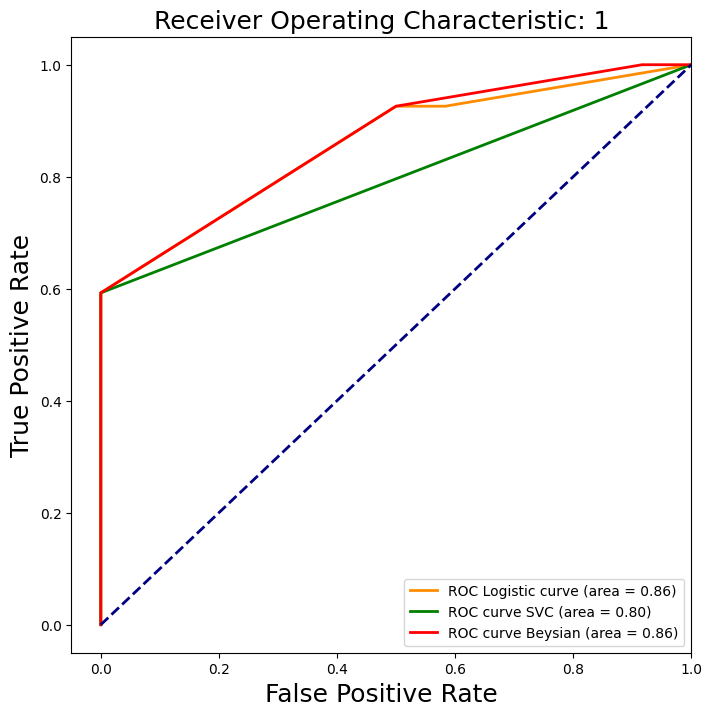

In [62]:
# Plot for logreg
log_preds = logreg.predict_proba(X_test)[:,1]
log_fpr, log_tpr, _ = metrics.roc_curve(y_test, log_preds)
log_roc_auc = metrics.auc(log_fpr, log_tpr)

# Plot for svm
svm_preds = svm_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

# Plot for bng
bng_preds = gnb_model.predict_proba(X_test)[:,1]
bng_fpr, bng_tpr, _ = metrics.roc_curve(y_test, bng_preds)
bng_roc_auc = metrics.auc(bng_fpr, bng_tpr)

plt.figure(figsize=[8,8])
lw = 2
plt.plot(log_fpr, log_tpr, color='darkorange', lw = lw, label = 'ROC Logistic curve (area = %0.2f)' % log_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw = lw, label = 'ROC curve SVC (area = %0.2f)' % svm_roc_auc)
plt.plot(bng_fpr, bng_tpr, color='red', lw = lw, label = 'ROC curve Beysian (area = %0.2f)' % bng_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: 1', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Fit Logistic model with best parameters

In [63]:
ghg_binary

,Country/Region,NDC_partnership,Emission_class,Capita_class,GDP_class
0,China,0,1,1,1
1,United States,1,0,0,1
2,India,0,1,1,1
3,Russia,0,0,0,1
4,Japan,1,0,0,1
...,...,...,...,...,...
188,Kiribati,0,1,1,1
189,Cook Islands,0,1,0,0
190,Nauru,1,0,0,0
191,Tuvalu,0,0,0,1


In [64]:
# Define the target variable
# 1 == increase, 0 == decrease

# Select the independent variable and target variable
predictor_col = ['NDC_partnership', 'Capita_class', 'GDP_class']

X = ghg_binary[predictor_col]
y = ghg_binary['Emission_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='liblinear')

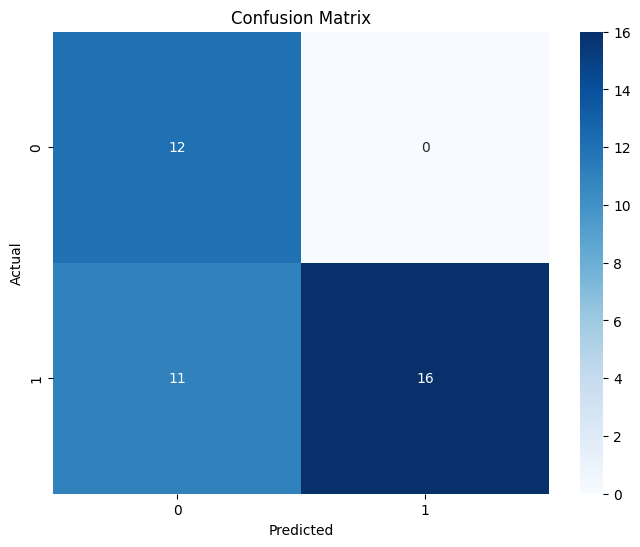

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       1.00      0.59      0.74        27

    accuracy                           0.72        39
   macro avg       0.76      0.80      0.71        39
weighted avg       0.85      0.72      0.73        39

Classification accuracy:  0.7179
Misclassification rate:  0.2821
Sensitivity:  0.5926
Specificity:  1.0
False positive rate:  0.0
Precision:  1.0
Using 5-fold cross validation: 0.75 accuracy with a standard deviation of 0.06


In [65]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = logreg.classes_

# Create a heat map of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print(metrics.classification_report(y_test, y_pred))

TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
misclassification_rate = (FP + FN) / float(TP+TN+FP+FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print('Classification accuracy: ', round(class_accuracy, 4))
print('Misclassification rate: ', round(misclassification_rate, 4))
print('Sensitivity: ', round(sensitivity, 4))
print('Specificity: ', round(specificity, 4))
print('False positive rate: ', round(false_positive_rate, 4))
print('Precision: ', round(precision, 4))

scores = cross_val_score(logreg, X_train, y_train, cv=5)

print("Using 5-fold cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Test using scaled X mixed featues

In [66]:
X = ghg_binary[predictor_col]
y = ghg_binary['Emission_class']

scalar = StandardScaler()
Xs = scalar.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
svm_model = svm.SVC(kernel = 'linear', C = 100, gamma= 0.001, probability = True)
svm_model.fit(Xs_train,ys_train)

SVC(C=100, gamma=0.001, kernel='linear', probability=True)

In [68]:
logreg.penalty = 'l1'
logreg_model = LogisticRegression(C=1, max_iter=10000, solver='liblinear')
logreg_model.fit(Xs_train, ys_train)

LogisticRegression(C=1, max_iter=10000, solver='liblinear')

In [69]:
gnb_model = GaussianNB()
gnb_model.fit(Xs_train, ys_train)

GaussianNB()

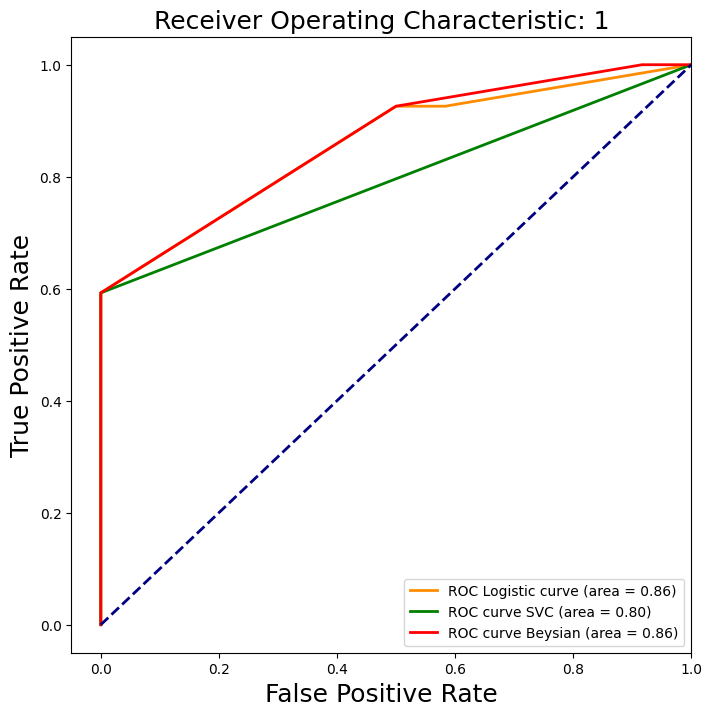

In [70]:
# Plot for logreg
log_preds = logreg.predict_proba(Xs_test)[:,1]
log_fpr, log_tpr, _ = metrics.roc_curve(ys_test, log_preds)
log_roc_auc = metrics.auc(log_fpr, log_tpr)

# Plot for svm
svm_preds = svm_model.predict_proba(Xs_test)[:,1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(ys_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

# Plot for bng
bng_preds = gnb_model.predict_proba(Xs_test)[:,1]
bng_fpr, bng_tpr, _ = metrics.roc_curve(ys_test, bng_preds)
bng_roc_auc = metrics.auc(bng_fpr, bng_tpr)

plt.figure(figsize=[8,8])
lw = 2
plt.plot(log_fpr, log_tpr, color='darkorange', lw = lw, label = 'ROC Logistic curve (area = %0.2f)' % log_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw = lw, label = 'ROC curve SVC (area = %0.2f)' % svm_roc_auc)
plt.plot(bng_fpr, bng_tpr, color='red', lw = lw, label = 'ROC curve Beysian (area = %0.2f)' % bng_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: 1', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix of Logreg Scaled Binary X Features
- No difference to non scaled version

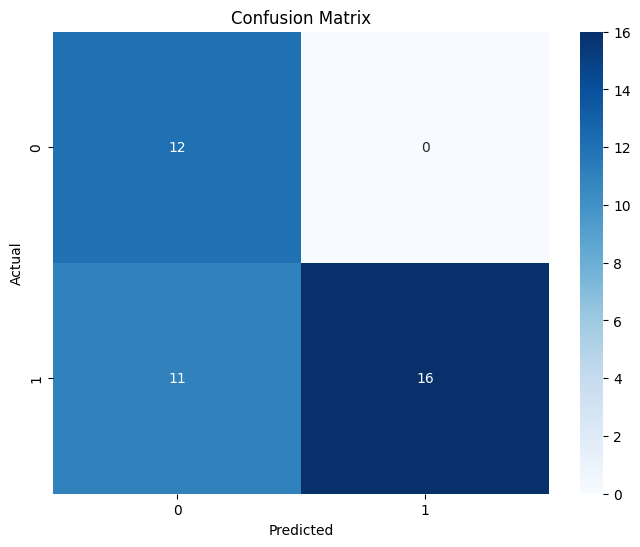

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       1.00      0.59      0.74        27

    accuracy                           0.72        39
   macro avg       0.76      0.80      0.71        39
weighted avg       0.85      0.72      0.73        39

Classification accuracy:  0.7179
Misclassification rate:  0.2821
Sensitivity:  0.5926
Specificity:  1.0
False positive rate:  0.0
Precision:  1.0
Using 5-fold cross validation: 0.75 accuracy with a standard deviation of 0.06


In [71]:
# Make predictions on the testing set
ys_pred = logreg.predict(Xs_test)

# Create a confusion matrix
cm2 = metrics.confusion_matrix(ys_test, ys_pred)

# Define the class labels
class_labels = logreg.classes_

# Create a heat map of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print(metrics.classification_report(ys_test, ys_pred))

TP = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]
TN = cm2[0,0]

class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
misclassification_rate = (FP + FN) / float(TP+TN+FP+FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print('Classification accuracy: ', round(class_accuracy, 4))
print('Misclassification rate: ', round(misclassification_rate, 4))
print('Sensitivity: ', round(sensitivity, 4))
print('Specificity: ', round(specificity, 4))
print('False positive rate: ', round(false_positive_rate, 4))
print('Precision: ', round(precision, 4))

scores = cross_val_score(logreg, Xs_train, ys_train, cv=5)

print("Using 5-fold cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Test using scaled mixed X features 
- Interestingly the SVC model has higher True Positive Rate 
- Overall higher than the binary features version even though the Confusion Matrix  gives similar results

In [72]:
predictor_col_nonbinary = ['Capita change from Base year to 2020 (%)', 'GDP_per_million change from Base year to 2020 (%)', 'NDC_partnership']
scalar = StandardScaler()


X2 = ghg_combined[predictor_col]
Xs = scalar.fit_transform(X2)
Xs = pd.DataFrame(Xs, columns=X2.columns)

y2 = ghg_combined['Emission_class']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y2, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [73]:
svm_model = svm.SVC(kernel = 'linear', C = 100, gamma= 0.001, probability = True)
svm_model.fit(Xs_train,ys_train)

SVC(C=100, gamma=0.001, kernel='linear', probability=True)

In [74]:
logreg.penalty = 'l1'
logreg_model = LogisticRegression(C=1, max_iter=10000, solver='liblinear')
logreg_model.fit(Xs_train, ys_train)

LogisticRegression(C=1, max_iter=10000, solver='liblinear')

In [75]:
gnb_model = GaussianNB()
gnb_model.fit(Xs_train, ys_train)

GaussianNB()

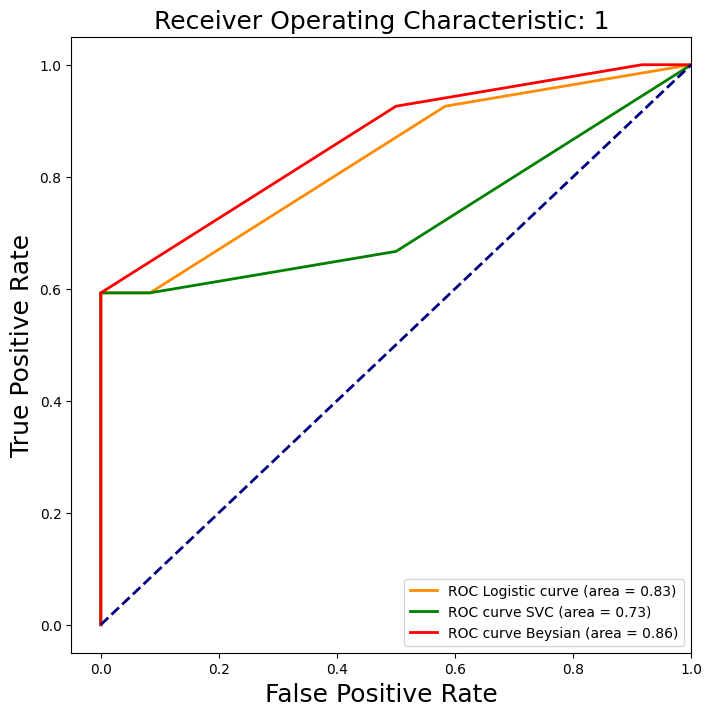

In [76]:
# Plot for logreg
log_preds = logreg.predict_proba(Xs_test)[:,1]
log_fpr, log_tpr, _ = metrics.roc_curve(ys_test, log_preds)
log_roc_auc = metrics.auc(log_fpr, log_tpr)

# Plot for svm
svm_preds = svm_model.predict_proba(Xs_test)[:,1]
svm_fpr, svm_tpr, _ = metrics.roc_curve(ys_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

# Plot for bng
bng_preds = gnb_model.predict_proba(Xs_test)[:,1]
bng_fpr, bng_tpr, _ = metrics.roc_curve(ys_test, bng_preds)
bng_roc_auc = metrics.auc(bng_fpr, bng_tpr)

plt.figure(figsize=[8,8])
lw = 2
plt.plot(log_fpr, log_tpr, color='darkorange', lw = lw, label = 'ROC Logistic curve (area = %0.2f)' % log_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw = lw, label = 'ROC curve SVC (area = %0.2f)' % svm_roc_auc)
plt.plot(bng_fpr, bng_tpr, color='red', lw = lw, label = 'ROC curve Beysian (area = %0.2f)' % bng_roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: 1', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrixv of Bayesian Model mixed scaled X features

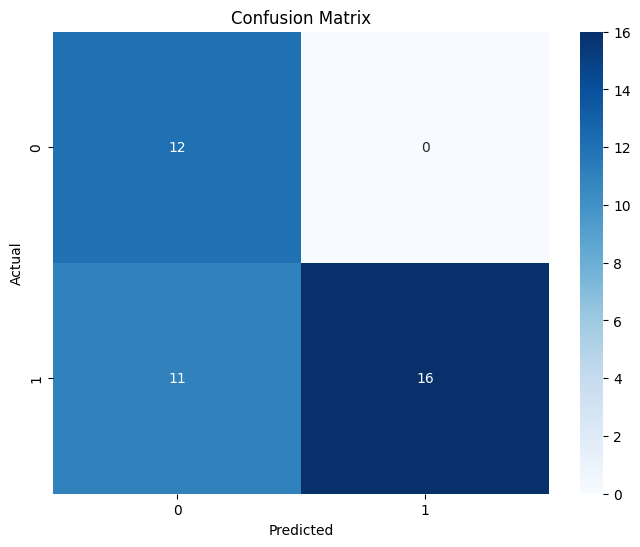

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       1.00      0.59      0.74        27

    accuracy                           0.72        39
   macro avg       0.76      0.80      0.71        39
weighted avg       0.85      0.72      0.73        39

Classification accuracy:  0.7179
Misclassification rate:  0.2821
Sensitivity:  0.5926
Specificity:  1.0
False positive rate:  0.0
Precision:  1.0
Using 5-fold cross validation: 0.78 accuracy with a standard deviation of 0.07


In [77]:
# Make predictions on the testing set
ys_pred = gnb_model.predict(Xs_test)

# Create a confusion matrix
cm2 = metrics.confusion_matrix(ys_test, ys_pred)

# Define the class labels
class_labels = gnb_model.classes_

# Create a heat map of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print(metrics.classification_report(y2_test, ys_pred))

TP = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]
TN = cm2[0,0]

class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
misclassification_rate = (FP + FN) / float(TP+TN+FP+FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print('Classification accuracy: ', round(class_accuracy, 4))
print('Misclassification rate: ', round(misclassification_rate, 4))
print('Sensitivity: ', round(sensitivity, 4))
print('Specificity: ', round(specificity, 4))
print('False positive rate: ', round(false_positive_rate, 4))
print('Precision: ', round(precision, 4))

scores = cross_val_score(gnb_model, Xs_train, ys_train, cv=5)

print("Using 5-fold cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Confusion Matric of Logreg scaled mixed features

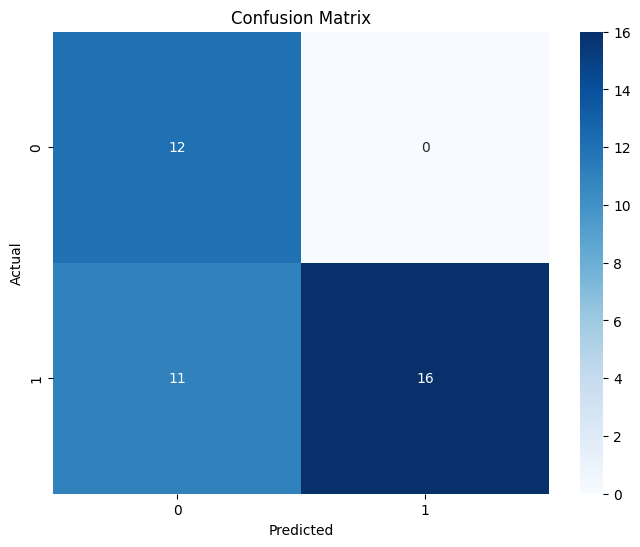

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       1.00      0.59      0.74        27

    accuracy                           0.72        39
   macro avg       0.76      0.80      0.71        39
weighted avg       0.85      0.72      0.73        39

Classification accuracy:  0.7179
Misclassification rate:  0.2821
Sensitivity:  0.5926
Specificity:  1.0
False positive rate:  0.0
Precision:  1.0
Using 5-fold cross validation: 0.75 accuracy with a standard deviation of 0.06


In [78]:
# Make predictions on the testing set
ys_pred = logreg.predict(Xs_test)

# Create a confusion matrix
cm2 = metrics.confusion_matrix(ys_test, ys_pred)

# Define the class labels
class_labels = logreg.classes_

# Create a heat map of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

print(metrics.classification_report(ys_test, ys_pred))

TP = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]
TN = cm2[0,0]

class_accuracy = (TP + TN) / float(TP + TN + FP + FN)
misclassification_rate = (FP + FN) / float(TP+TN+FP+FN)
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)
false_positive_rate = FP / float(TN + FP)
precision = TP / float(TP + FP)

print('Classification accuracy: ', round(class_accuracy, 4))
print('Misclassification rate: ', round(misclassification_rate, 4))
print('Sensitivity: ', round(sensitivity, 4))
print('Specificity: ', round(specificity, 4))
print('False positive rate: ', round(false_positive_rate, 4))
print('Precision: ', round(precision, 4))

scores = cross_val_score(logreg, Xs_train, ys_train, cv=5)

print("Using 5-fold cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Mapping of Countries based on amount of Emission to 3 groups 
- Choose only countries higher than 10 as some literatures argued that high emission is about that amount 
- THough there is no officlal classification method and they may vary
- Check correlation between Economic developement and GHG emission

In [79]:
total_ghg_greater_than_10 = ghg_combined.loc[ghg_combined['emission_2020'] >= 10,:]

# Define the target variable based on emission ranges
def map_classes(emission):
    if emission >= 10 and emission < 100:
        return 'High-emission'
    elif emission >= 100 and emission < 1000:
        return 'Very-high-emission'
    elif emission >= 1000:
        return 'Top-emission'

total_ghg_greater_than_10['Emission_class'] = total_ghg_greater_than_10['emission_2020'].apply(map_classes)

C:\Users\junfe\AppData\Local\Temp\ipykernel_10264\1431597447.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_ghg_greater_than_10['Emission_class'] = total_ghg_greater_than_10['emission_2020'].apply(map_classes)


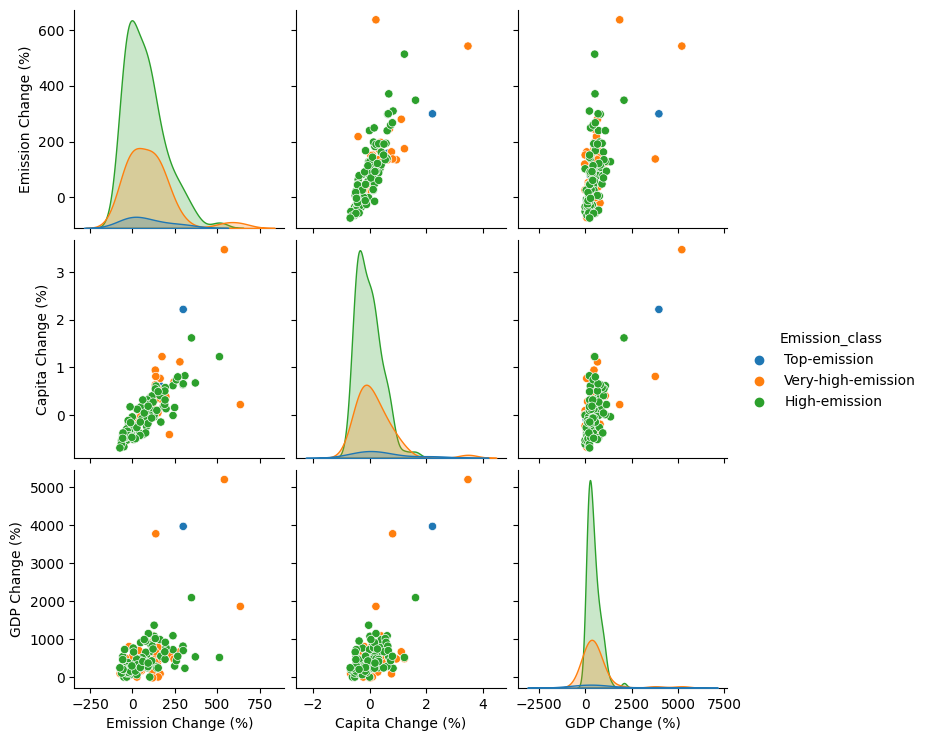

In [80]:
col_map = {
    'Emission Change from Base year to 2020 (%)': 'Emission Change (%)',
    'Capita change from Base year to 2020 (%)': 'Capita Change (%)',
    'GDP_per_million change from Base year to 2020 (%)': 'GDP Change (%)'
}
total_ghg_greater_than_10 = total_ghg_greater_than_10.rename(columns = col_map)

sns.pairplot(total_ghg_greater_than_10, hue='Emission_class', vars=['Emission Change (%)', 
                                             'Capita Change (%)', 
                                             'GDP Change (%)'])
plt.show()

In [81]:
top_emission = total_ghg_greater_than_10[total_ghg_greater_than_10['Emission_class']== 'Top-emission']
col_to_drop = ['1990','2020','capita_2020','base_year_capita','base_year','tCO2/million_$GDP_2020','GDP_per_million_2020',
              'GDP_per_million_base_year', 'emission_2020','emission_base_year', 'NDC_partnership']
top_emission = top_emission.drop(col_to_drop, axis=1)
top_emission

,Country/Region,Emission Change (%),Capita Change (%),GDP Change (%),Emission_class,Capita_class,GDP_class
0,China,299.611900,2.217544,3970.190574,Top-emission,1,1
1,United States,-5.983394,-0.291986,250.389202,Top-emission,0,1
2,India,158.556012,0.633803,731.109374,Top-emission,1,1
3,Russia,-21.493175,-0.193822,187.979305,Top-emission,0,1
4,Japan,-7.386662,-0.094044,60.880333,Top-emission,0,1
5,Brazil,79.697890,0.258794,270.734930,Top-emission,1,1


In [82]:
col_to_use = ['Emission Change (%)', 'Capita Change (%)', 'GDP Change (%)']
total_ghg_greater_than_10_change = total_ghg_greater_than_10[col_to_use]
total_ghg_greater_than_10_change.corr()

,Emission Change (%),Capita Change (%),GDP Change (%)
Emission Change (%),1.000000,0.789751,0.547594
Capita Change (%),0.789751,1.000000,0.696981
GDP Change (%),0.547594,0.696981,1.000000


In [83]:
total_ghg_greater_than_10.head()

,Country/Region,Emission Change (%),1990,2020,capita_2020,base_year_capita,Capita Change (%),base_year,tCO2/million_$GDP_2020,GDP_per_million_2020,GDP_per_million_base_year,GDP Change (%),emission_2020,emission_base_year,NDC_partnership,Emission_class,Capita_class,GDP_class
0,China,299.611900,2.85,9.17,0.000009,0.000003,2.217544,8975.44,881.21,1.468761e+07,3.608581e+05,3970.190574,12942.87,3238.86,0,Top-emission,1,1
1,United States,-5.983394,23.46,16.61,0.000017,0.000023,-0.291986,981.96,263.48,2.089411e+07,5.963115e+06,250.389202,5505.18,5855.54,1,Top-emission,0,1
2,India,158.556012,1.42,2.32,0.000002,0.000001,0.633803,3856.83,1199.85,2.667683e+06,3.209786e+05,731.109374,3200.82,1237.96,0,Top-emission,1,1
3,Russia,-21.493175,20.07,16.18,0.000016,0.000020,-0.193822,5746.32,1566.52,1.488318e+06,5.168142e+05,187.979305,2331.48,2969.78,0,Top-emission,0,1
4,Japan,-7.386662,9.57,8.67,0.000009,0.000010,-0.094044,377.25,217.17,5.040107e+06,3.132830e+06,60.880333,1094.56,1181.86,1,Top-emission,0,1


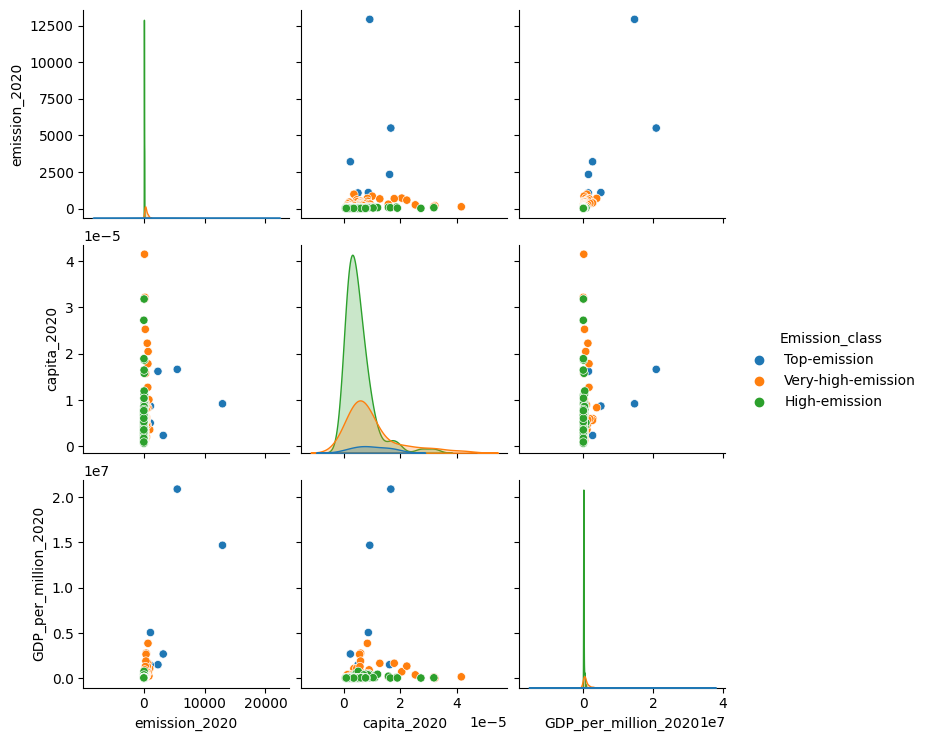

In [84]:
sns.pairplot(total_ghg_greater_than_10, hue='Emission_class', vars=['emission_2020', 
                                             'capita_2020', 
                                             'GDP_per_million_2020'])
plt.show()

In [85]:
col_to_use = ['Country/Region','emission_2020', 'capita_2020','GDP_per_million_2020']
total_ghg_greater_than_10_2020 = total_ghg_greater_than_10[col_to_use]
total_ghg_greater_than_10_2020.head()

,Country/Region,emission_2020,capita_2020,GDP_per_million_2020
0,China,12942.87,0.000009,1.468761e+07
1,United States,5505.18,0.000017,2.089411e+07
2,India,3200.82,0.000002,2.667683e+06
3,Russia,2331.48,0.000016,1.488318e+06
4,Japan,1094.56,0.000009,5.040107e+06


In [86]:
total_ghg_greater_than_10_2020[['emission_2020', 'capita_2020','GDP_per_million_2020']].corr()

,emission_2020,capita_2020,GDP_per_million_2020
emission_2020,1.000000,0.107041,0.820754
capita_2020,0.107041,1.000000,0.141622
GDP_per_million_2020,0.820754,0.141622,1.000000


# Merging of Energy Sector divisions to create stackplot of overall trend of GHG emission

In [87]:
ghg_energy = 'ghg-emissions_Energy.csv'
ghg_energy = pd.read_csv(ghg_energy, index_col = 'Country/Region')
ghg_energy

,unit,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,MtCO2e,2359.05,2473.17,2570.25,2786.06,2897.77,3226.14,3196.78,3251.14,3338.74,...,9266.08,9516.56,9942.22,9961.64,9846.65,9779.90,10004.30,10481.54,10656.99,10818.71
United States,MtCO2e,5135.16,5096.73,5170.32,5279.12,5358.47,5411.16,5570.44,5841.51,5887.60,...,5524.09,5315.65,5463.03,5500.72,5386.87,5270.73,5209.46,5407.18,5286.55,4744.20
India,MtCO2e,620.96,664.82,681.52,705.47,739.69,792.84,827.46,872.41,886.42,...,1798.74,1945.03,2001.10,2172.27,2184.34,2217.71,2332.28,2468.70,2431.19,2224.18
Russia,MtCO2e,2590.83,2538.49,2381.20,2216.29,2010.63,1951.63,1916.61,1792.84,1796.11,...,2093.71,2060.00,2016.54,1992.39,1980.99,1975.56,2011.34,2100.24,2145.50,2054.92
Japan,MtCO2e,1064.61,1076.80,1086.86,1079.95,1132.67,1143.42,1157.12,1147.75,1109.95,...,1205.48,1245.65,1257.57,1207.29,1168.70,1155.13,1140.70,1100.83,1063.79,1004.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nauru,MtCO2e,0.13,0.13,0.12,0.11,0.11,0.11,0.10,0.10,0.10,...,0.04,0.04,0.05,0.05,0.05,0.05,0.06,0.05,0.05,0.04
Tuvalu,MtCO2e,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Niue,MtCO2e,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00


In [88]:
# now compare between sectors for year 2020 from different 
# database to see which industry produce greatest percentage of ghg emission
def get_sector_overall_ghg(data):
    
   
    ghg_sector = pd.read_csv(data)
    
    rows_to_drop = [193,194]
    columns_to_drop = ['unit','Country/Region']
    
    ghg_sector = ghg_sector.drop(columns_to_drop, axis=1)
    ghg_sector = ghg_sector.drop(rows_to_drop)
    ghg_sector = ghg_sector.replace('false', 0).astype('float64')
    
    column_sums = {}
    
    for column in ghg_sector.columns:
        column_sum = ghg_sector[column].sum()
        column_sums[column] = round(column_sum, 2)
    
    return column_sums

In [89]:
ghg_energy = 'ghg-emissions_Energy.csv'
ghg_energy = get_sector_overall_ghg(ghg_energy)

In [90]:
ghg_lucf = 'ghg-emissions_LUCF.csv'
ghg_lucf = get_sector_overall_ghg(ghg_lucf)

In [91]:
ghg_agriculture = 'ghg-emissions_Agriculture.csv'
ghg_agriculture = get_sector_overall_ghg(ghg_agriculture)

In [92]:
ghg_ind_process = 'ghg-emissions_Industrial Process.csv'
ghg_ind_process = get_sector_overall_ghg(ghg_ind_process)

In [93]:
ghg_bunker_fuel = 'ghg-emissions_Bunker_fuel.csv'
ghg_bunker_fuel = get_sector_overall_ghg(ghg_bunker_fuel)

In [94]:
ghg_waste = 'ghg-emissions_Waste.csv'
ghg_waste = get_sector_overall_ghg(ghg_waste)

In [95]:
ghg_total_df = pd.DataFrame([ghg_energy, ghg_agriculture, ghg_waste, ghg_ind_process, ghg_bunker_fuel, ghg_lucf])

new_index = ['Energy/Heat', 'Agriculture', 'Waste', 'Industrial Process', 'Bunker Fuel', 'Land-use Change and Forestry']

# Replace the index with the new order
ghg_total_df.set_index(pd.Index(new_index), inplace=True)

ghg_total_transpose = ghg_total_df.T
ghg_total_transpose

,Energy/Heat,Agriculture,Waste,Industrial Process,Bunker Fuel,Land-use Change and Forestry
1990,22281.69,4970.81,1363.98,931.32,607.96,2023.99
1991,22417.99,4960.74,1394.68,939.42,616.92,2023.96
1992,22326.77,4940.45,1417.80,1011.85,649.69,2023.97
1993,22469.51,4910.04,1443.87,1027.17,640.74,2024.42
1994,22548.82,4952.60,1470.51,1136.01,663.80,2024.06
1995,23174.21,5007.82,1476.01,1209.09,685.61,2029.70
1996,23673.16,5034.57,1477.78,1260.87,705.47,1819.57
1997,24053.02,4963.89,1473.81,1310.26,729.07,2789.09
1998,24181.86,5019.72,1465.79,1315.31,748.85,2118.87
1999,24262.37,5076.16,1463.95,1324.87,784.91,1927.79


In [96]:
ghg_total_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Energy/Heat,22281.69,22417.99,22326.77,22469.51,22548.82,23174.21,23673.16,24053.02,24181.86,24262.37,...,33700.22,34130.33,34755.97,34828.25,34630.74,34588.13,35096.03,35975.42,35899.51,34169.99
Agriculture,4970.81,4960.74,4940.45,4910.04,4952.60,5007.82,5034.57,4963.89,5019.72,5076.16,...,5618.31,5640.78,5580.17,5631.02,5655.00,5691.00,5781.24,5781.27,5776.09,5858.50
Waste,1363.98,1394.68,1417.80,1443.87,1470.51,1476.01,1477.78,1473.81,1465.79,1463.95,...,1466.73,1475.97,1483.46,1513.66,1543.01,1560.31,1583.23,1606.30,1629.26,1652.21
Industrial Process,931.32,939.42,1011.85,1027.17,1136.01,1209.09,1260.87,1310.26,1315.31,1324.87,...,2371.40,2454.53,2568.03,2691.78,2685.68,2783.46,2851.90,2960.94,3057.81,3120.31
Bunker Fuel,607.96,616.92,649.69,640.74,663.80,685.61,705.47,729.07,748.85,784.91,...,1067.05,1024.89,1029.87,1069.86,1120.65,1157.29,1211.15,1239.21,1237.58,874.94
Land-use Change and Forestry,2023.99,2023.96,2023.97,2024.42,2024.06,2029.70,1819.57,2789.09,2118.87,1927.79,...,534.01,562.19,513.89,863.03,916.68,1397.56,1349.51,1509.87,1784.81,1386.09


# Visualization of Global GHG Emission by Industry from 1990-2020

Text(0.5, 1.0, 'Greenhouse Gas Emissions by Sector')

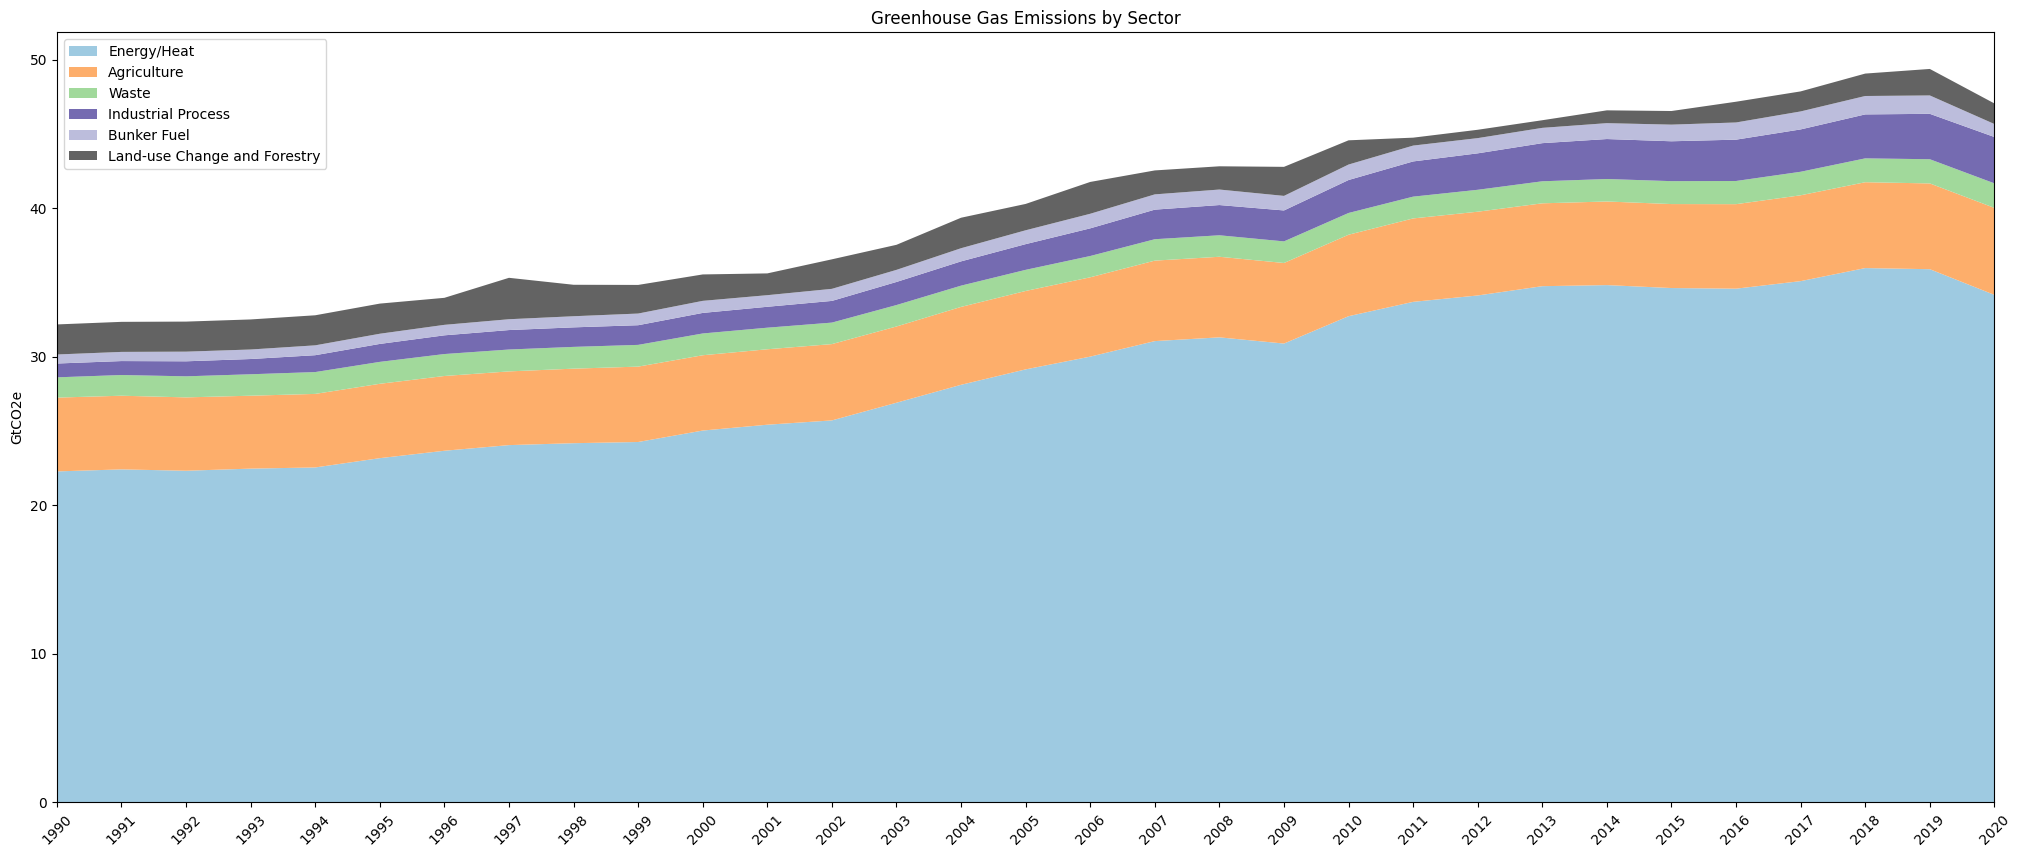

In [97]:
index = ghg_total_transpose.index.tolist()  # Transpose the DataFrame index and convert it to a list
values = ((ghg_total_df.values)/1000).tolist()  # Assuming the DataFrame has the desired index order 
# Make sure to convert MegatCO2e to GigatCO2e

plt.figure(figsize=(25, 10))
colormap = plt.cm.get_cmap('tab20c')

# Create the stack plot using plt.stackplot()
plt.stackplot(index, values, labels=ghg_total_transpose.columns, alpha =1, colors=[colormap(0.1), colormap(0.3), colormap(0.5), colormap(0.6), colormap(0.7), colormap(0.8)] )

plt.xticks(rotation=45)
plt.xlim('1990', '2020')
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('GtCO2e')
plt.title('Greenhouse Gas Emissions by Sector')

# Concatenating GHG in Energy Sector 2020

In [98]:
# Compare between different grouping in Energy sector

def get_energy_sector_2020_ghg(data):
    
   
    ghg_energy = pd.read_csv(data)
    
    rows_to_drop = [193,194]
    columns_to_drop = ['unit','Country/Region']
    
    ghg_energy = ghg_energy.drop(columns_to_drop, axis=1)
    ghg_energy = ghg_energy.drop(rows_to_drop)
    ghg_energy = ghg_energy.replace('false', 0).astype('float64')
    
    column_sums = {}
    
    for column in ghg_energy.columns:
        column_sum = ghg_energy[column].sum()
        column_sums[column] = round(column_sum, 2)
    
    return column_sums

In [99]:
ghg_energy_building = 'ghg-emissions_Energy_Building.csv'
ghg_energy_building = get_energy_sector_2020_ghg(ghg_energy_building)

In [100]:
ghg_energy_electricity = 'ghg-emissions_Energy_electricity_heat.csv'
ghg_energy_electricity = get_energy_sector_2020_ghg(ghg_energy_electricity)

In [101]:
ghg_energy_fuel_combustion = 'ghg-emissions_Energy_Other_Fuel_Combustion.csv'
ghg_energy_fuel_combustion = get_energy_sector_2020_ghg(ghg_energy_fuel_combustion)

In [102]:
ghg_energy_fuel_transportation = 'ghg-emissions_Energy_Transportation.csv'
ghg_energy_fuel_transportation = get_energy_sector_2020_ghg(ghg_energy_fuel_transportation)

In [103]:
ghg_energy_fuel_industrial_process = 'ghg-emissions_Industrial Process.csv'
ghg_energy_fuel_industrial_process = get_energy_sector_2020_ghg(ghg_energy_fuel_industrial_porcess)

In [104]:
ghg_energy_combined_df = pd.DataFrame([ghg_energy_electricity, ghg_energy_building, ghg_energy_fuel_combustion, ghg_energy_fuel_transportation, ghg_energy_fuel_industrial_porcess])

new_index = ['Electricity/Heat', 'Building', 'Fuel Combustion', 'Transportation', 'Industrial Process']

# Replace the index with the new order
ghg_energy_combined_df.set_index(pd.Index(new_index), inplace=True)

ghg_energy_combined_df_transpose = ghg_energy_combined_df.T
ghg_energy_combined_df_transpose

,Electricity/Heat,Building,Fuel Combustion,Transportation,Industrial Process
1990,8552.98,2863.08,763.11,4062.24,931.32
1991,8684.87,2888.74,764.21,4090.06,939.42
1992,8838.63,2777.69,680.19,4156.09,1011.85
1993,8877.34,2844.68,692.63,4203.60,1027.17
1994,8979.49,2757.18,662.83,4272.39,1136.01
1995,9161.47,2835.07,614.05,4383.48,1209.09
1996,9515.65,2897.26,541.23,4571.53,1260.87
1997,9777.99,2879.04,590.02,4622.89,1310.26
1998,9991.06,2723.90,566.82,4718.68,1315.31
1999,10043.56,2794.61,576.22,4836.12,1324.87


# Visualization of GHG in Energy Sector from 1990-2020

Text(0.5, 1.0, 'Greenhouse Gas Emissions in the Energy Sector')

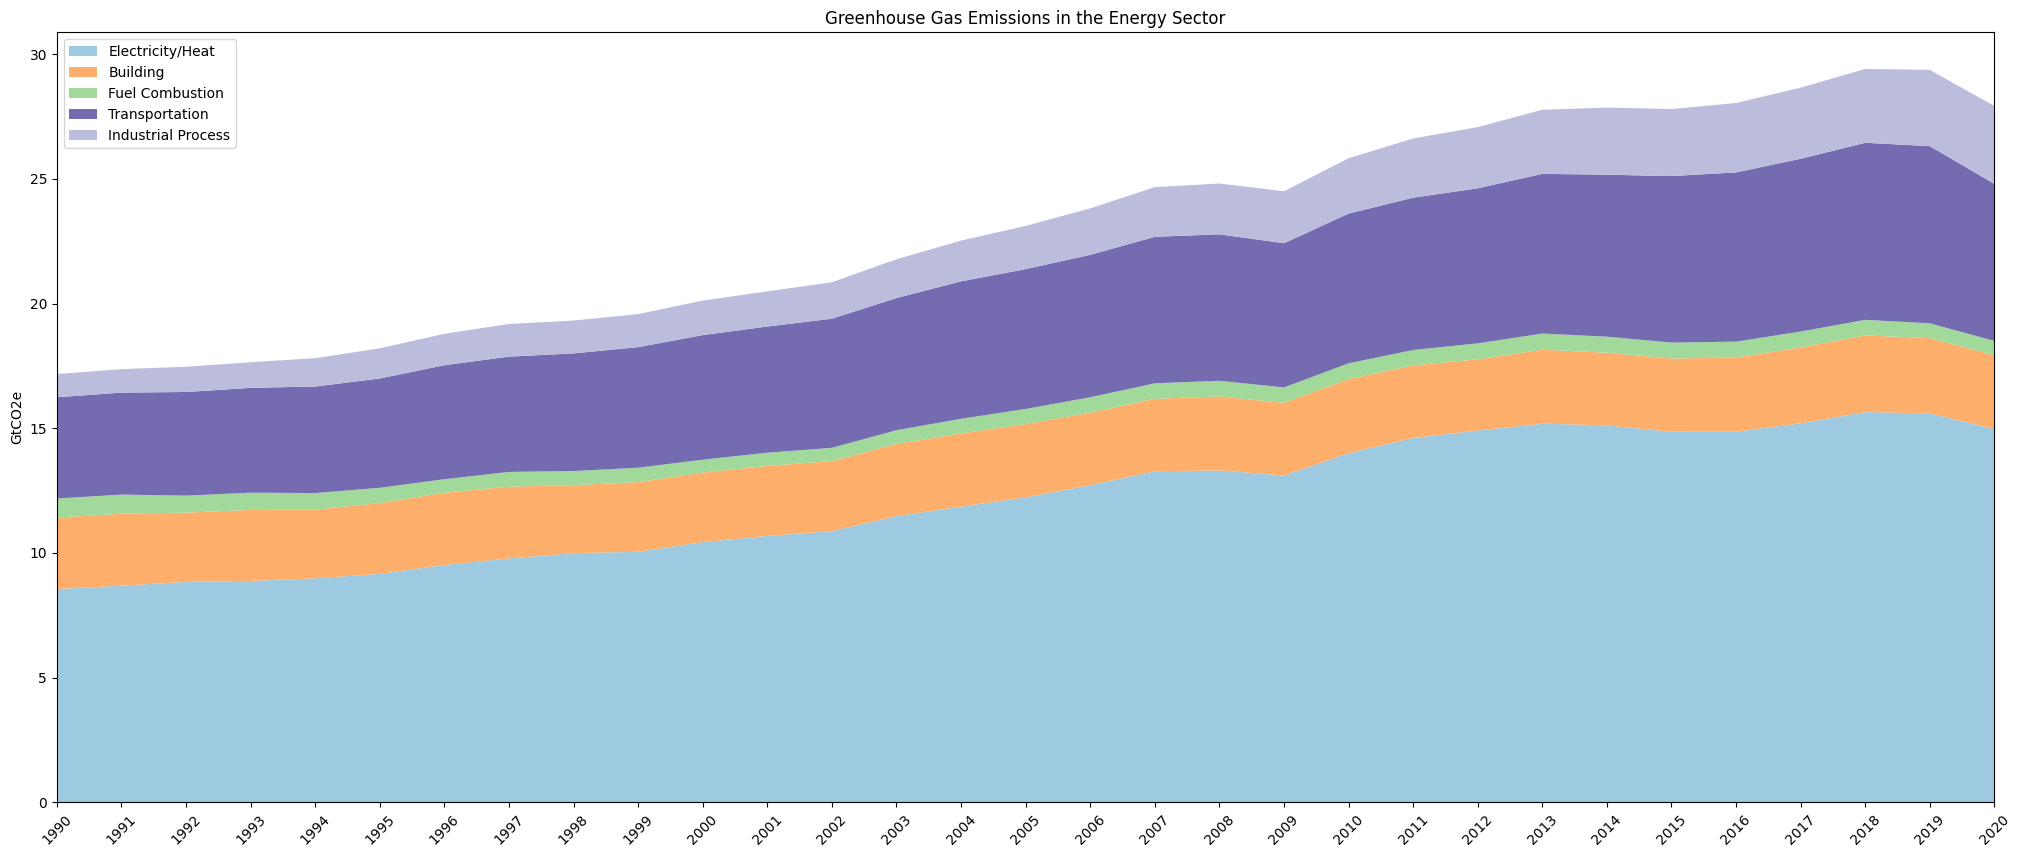

In [105]:
index = ghg_energy_combined_df_transpose.index.tolist()  # Transpose the DataFrame index and convert it to a list
values = ((ghg_energy_combined_df.values)/1000).tolist()  # Assuming the DataFrame has the desired index order 
# Make sure to convert MtCO2e to GtCO2e

plt.figure(figsize=(25, 10))
colormap = plt.cm.get_cmap('tab20c')

# Create the stack plot using plt.stackplot()
plt.stackplot(index, values, labels=ghg_energy_combined_df_transpose.columns, alpha =1, colors=[colormap(0.1), colormap(0.3), colormap(0.5), colormap(0.6), colormap(0.7)] )

plt.xticks(rotation=45)
plt.xlim('1990', '2020')
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('GtCO2e')
plt.title('Greenhouse Gas Emissions in the Energy Sector')

In [106]:
year_2020 = ghg_energy_combined_df['2020']
year_2020

Electricity/Heat      14967.02
Building               2954.16
Fuel Combustion         577.22
Transportation         6299.63
Industrial Process     3120.31
Name: 2020, dtype: float64

In [107]:
ghg_energy_combined_df.head()
year_2020 = ghg_energy_combined_df['2020']
year_2020_list = year_2020.tolist()

print(year_2020_list)

[14967.02, 2954.16, 577.22, 6299.63, 3120.31]


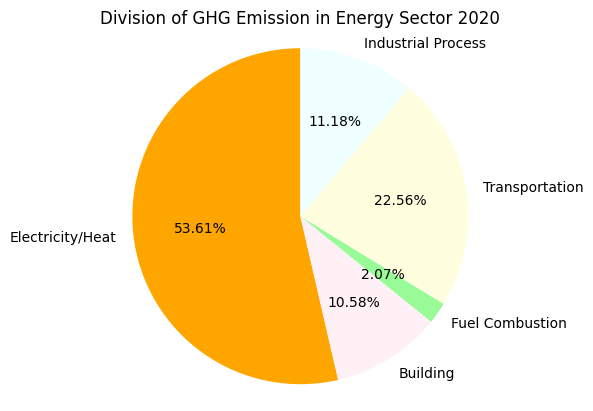

In [108]:
labels = 'Electricity/Heat', 'Building', 'Fuel Combustion', 'Transportation', 'Industrial Process'
frequency = year_2020_list

fig1, ax1 = plt.subplots()
colors = ( "orange", "lavenderblush", "palegreen",
          "lightyellow", "azure", "beige")
ax1.pie(frequency,  labels=labels, autopct='%1.2f%%', colors=colors,
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Division of GHG Emission in Energy Sector 2020')
plt.show()

# Analysis of Singapore GHG Emission

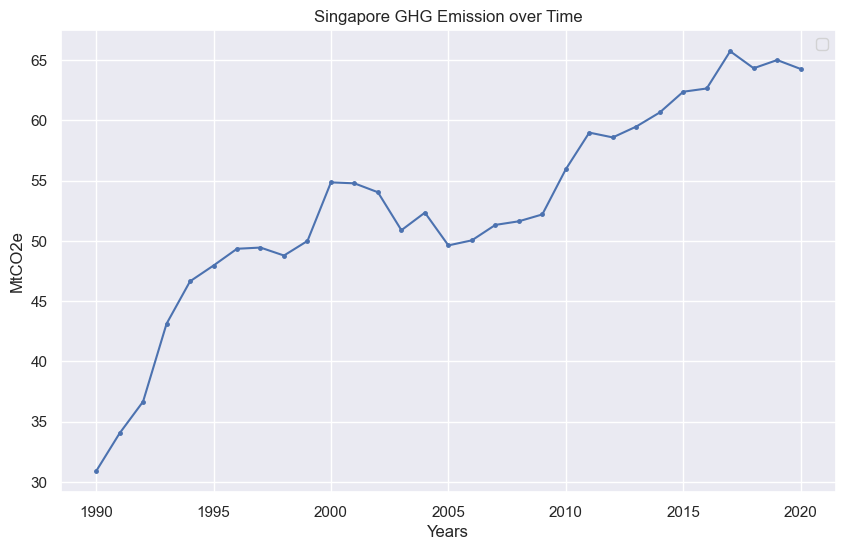

In [109]:
singapore_total_ghg = total_ghg[total_ghg['Country/Region'] == 'Singapore']
singapore_total_ghg = singapore_total_ghg.drop(['unit', 'Change from 1990 to latest reported year (%)'], axis=1)
singapore_total_ghg = singapore_total_ghg.set_index('Country/Region')

singapore_total_ghg_transposed = singapore_total_ghg.T

sns.set()

singapore_total_ghg_transposed.plot(kind='line', marker='.', markersize=5, figsize=(10, 6))

# Add labels, title, and legend
plt.xlabel('Years')
plt.ylabel('MtCO2e')
plt.title('Singapore GHG Emission over Time')
plt.legend('')
plt.show()

In [110]:
def get_ghg_singapore(data):
    
    data = pd.read_csv(data)
    ghg_singapore = data[data['Country/Region'] == 'Singapore']
    
    return ghg_singapore

In [111]:
ghg_energy = 'ghg-emissions_Energy.csv'
ghg_agriculture = 'ghg-emissions_Agriculture.csv'
ghg_ind_process = 'ghg-emissions_Industrial Process.csv'
ghg_bunker_fuel = 'ghg-emissions_Bunker_fuel.csv'
ghg_waste = 'ghg-emissions_Waste.csv'

In [112]:
singapore_ghg_agriculture = get_ghg_singapore(ghg_agriculture)
singapore_ghg_industrial_process = get_ghg_singapore(ghg_ind_process)
singapore_ghg_waste = get_ghg_singapore(ghg_waste)
singapore_ghg_energy = get_ghg_singapore(ghg_energy)

singapore_ghg_bunker_fuel = get_ghg_singapore(ghg_bunker_fuel)

In [113]:
singapore_ghg_combined_df = pd.concat([singapore_ghg_agriculture, singapore_ghg_industrial_process, singapore_ghg_waste,
                                          singapore_ghg_energy], axis=0)

# Reset the index of the combined dataframe
singapore_ghg_combined_df = singapore_ghg_combined_df.reset_index(drop=True)

new_index = ['Agriculture', 'Industrial Process', 'Waste', 'Energy']

# Replace the index with the new order
singapore_ghg_combined_df.set_index(pd.Index(new_index), inplace=True)

col_to_drop = ['Country/Region', 'unit']
singapore_ghg_combined_df = singapore_ghg_combined_df.drop(col_to_drop, axis = 1)
singapore_ghg_combined_df = singapore_ghg_combined_df.astype('float64')
singapore_ghg_combined_df_transpose = singapore_ghg_combined_df.T
singapore_ghg_combined_df_transpose

,Agriculture,Industrial Process,Waste,Energy
1990,0.09,0.43,1.19,29.18
1991,0.01,2.06,1.23,30.73
1992,0.01,3.69,1.27,31.69
1993,0.01,5.33,1.31,36.48
1994,0.01,6.96,1.35,38.33
1995,0.01,8.59,1.39,37.96
1996,0.01,9.00,1.44,38.90
1997,0.01,9.42,1.48,38.53
1998,0.01,9.83,1.53,37.41
1999,0.01,10.25,1.57,38.17


Text(0.5, 1.0, 'Greenhouse Gas Emissions in Singapore by Sector')

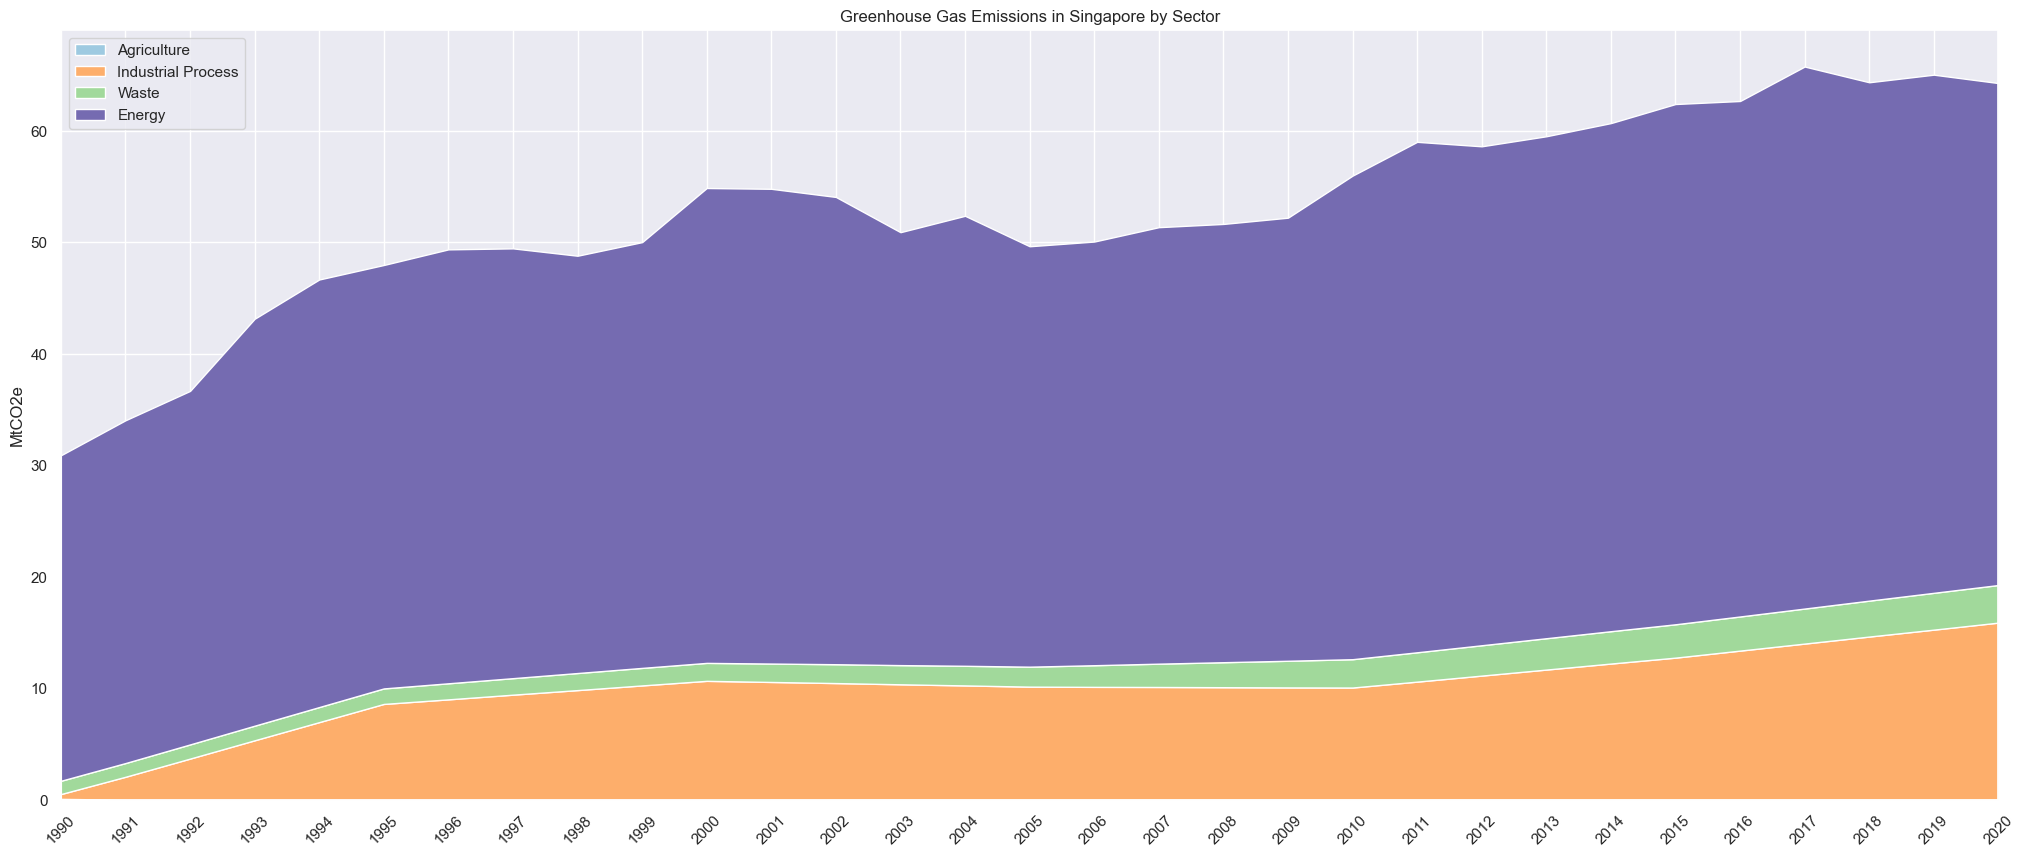

In [114]:
index = singapore_ghg_combined_df_transpose.index.tolist()  # Transpose the DataFrame index and convert it to a list
values = ((singapore_ghg_combined_df.values)).tolist()  # Assuming the DataFrame has the desired index order 
# Make sure to unit MtCO2e 

plt.figure(figsize=(25, 10))
colormap = plt.cm.get_cmap('tab20c')

# Create the stack plot using plt.stackplot()
plt.stackplot(index, values, labels=singapore_ghg_combined_df_transpose.columns, alpha=1,
              colors=[colormap(0.1), colormap(0.3), colormap(0.5), colormap(0.6)])

plt.xticks(rotation=45)
plt.xlim('1990', '2020')
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('MtCO2e')
plt.title('Greenhouse Gas Emissions in Singapore by Sector')

Text(0.5, 1.0, 'Greenhouse Gas Emissions in Singapore by Sector')

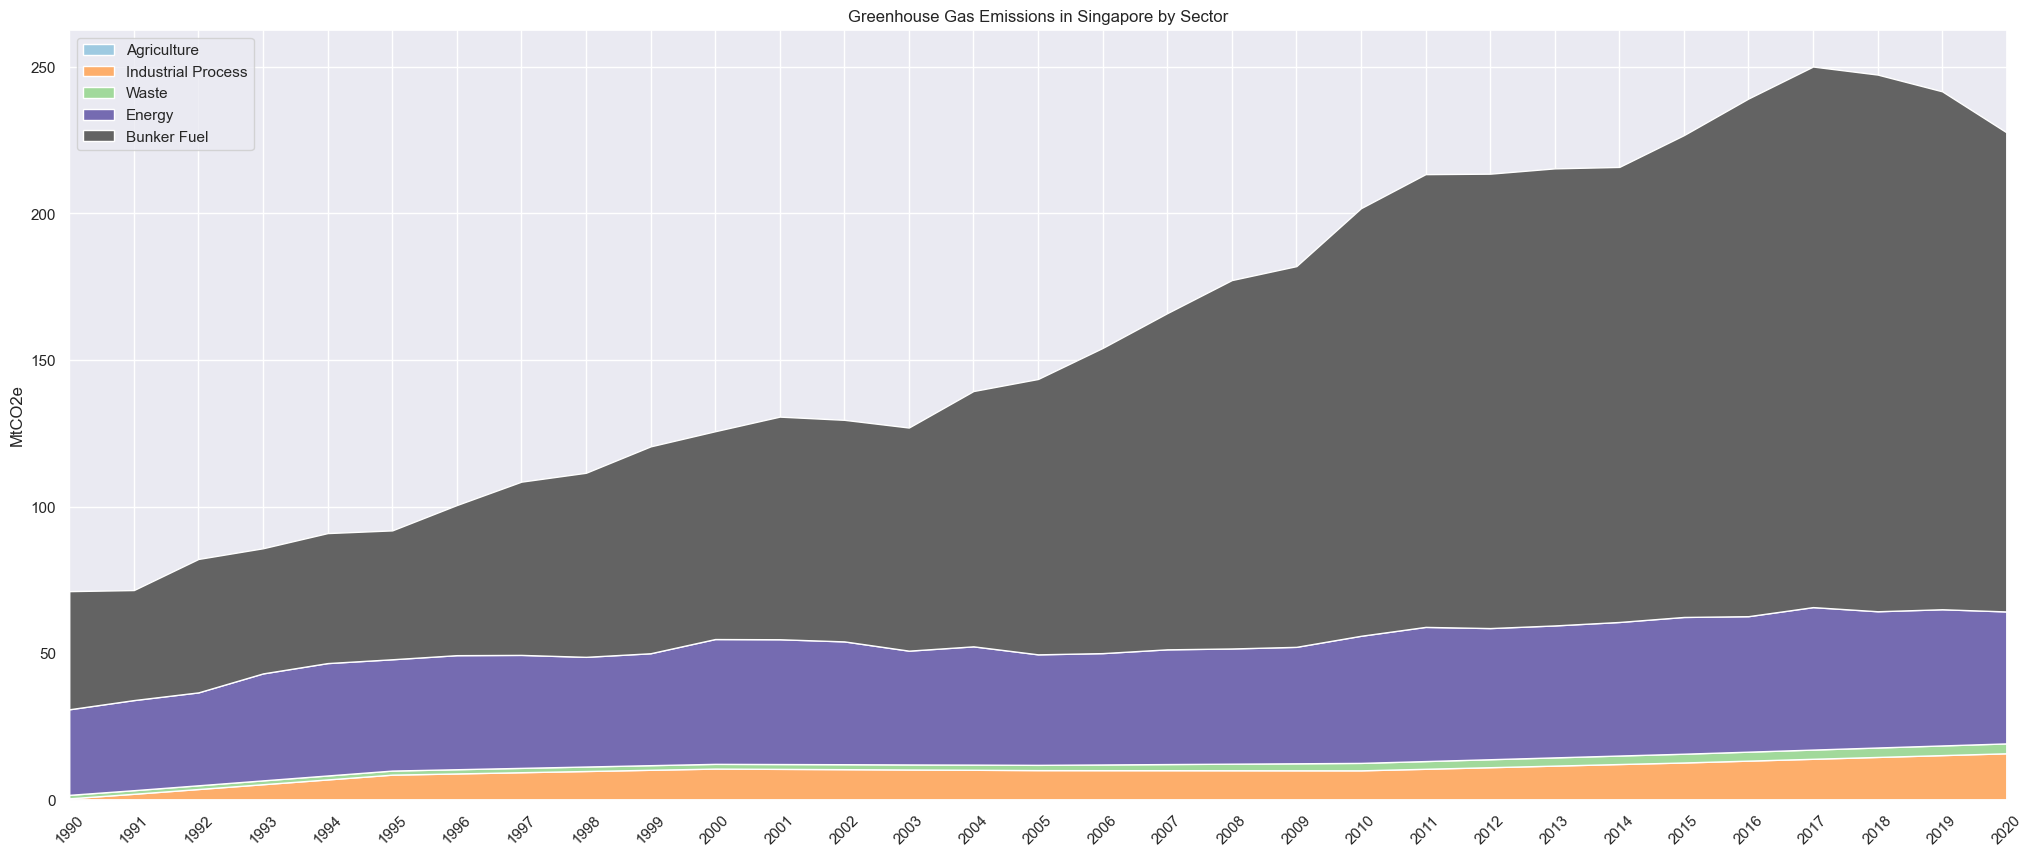

In [115]:
singapore_ghg_combined_bf_df = pd.concat([singapore_ghg_agriculture, singapore_ghg_industrial_process, singapore_ghg_waste,
                                          singapore_ghg_energy, singapore_ghg_bunker_fuel], axis=0)

# Reset the index of the combined dataframe
singapore_ghg_combined_df = singapore_ghg_combined_df.reset_index(drop=True)

new_index = ['Agriculture', 'Industrial Process', 'Waste', 'Energy', 'Bunker Fuel']

# Replace the index with the new order
singapore_ghg_combined_bf_df.set_index(pd.Index(new_index), inplace=True)



col_to_drop = ['Country/Region', 'unit']
singapore_ghg_combined_bf_df = singapore_ghg_combined_bf_df.drop(col_to_drop, axis = 1)
singapore_ghg_combined_bf_df = singapore_ghg_combined_bf_df.astype('float64')
singapore_ghg_combined_bf_df_transpose = singapore_ghg_combined_bf_df.T

index = singapore_ghg_combined_bf_df_transpose.index.tolist()  # Transpose the DataFrame index and convert it to a list
values = ((singapore_ghg_combined_bf_df.values)).tolist()  # Assuming the DataFrame has the desired index order 
# Make sure to unit MtCO2e 

plt.figure(figsize=(25, 10))
colormap = plt.cm.get_cmap('tab20c')

# Create the stack plot using plt.stackplot()
plt.stackplot(index, values, labels=singapore_ghg_combined_bf_df_transpose.columns, alpha=1,
              colors=[colormap(0.1), colormap(0.3), colormap(0.5), colormap(0.6), colormap(0.8)])

plt.xticks(rotation=45)
plt.xlim('1990', '2020')
plt.legend(loc='upper left')
plt.xlabel('')
plt.ylabel('MtCO2e')
plt.title('Greenhouse Gas Emissions in Singapore by Sector')

# Singapore goal based on NDC 2030 is to reduce carbon emission to about 60 MtCO2 from data from 2020 we are at about 64 MtCO2

In [116]:
singapore_total_ghg_t = singapore_total_ghg.T
singapore_total_ghg_t
new_column_name = {
    'Singapore': 'GHG_emission',
    'index' : 'Year'
}
# Rename the index using the rename() function
singapore_total_ghg_t = singapore_total_ghg_t.rename(columns=new_column_name)
singapore_total_ghg_t.columns = singapore_total_ghg_t.columns.rename('Year')
singapore_total_ghg_t

Year,GHG_emission
1990,30.89
1991,34.04
1992,36.67
1993,43.13
1994,46.65
1995,47.96
1996,49.35
1997,49.45
1998,48.79
1999,50.00


# Prediction using RandomForestRegressor

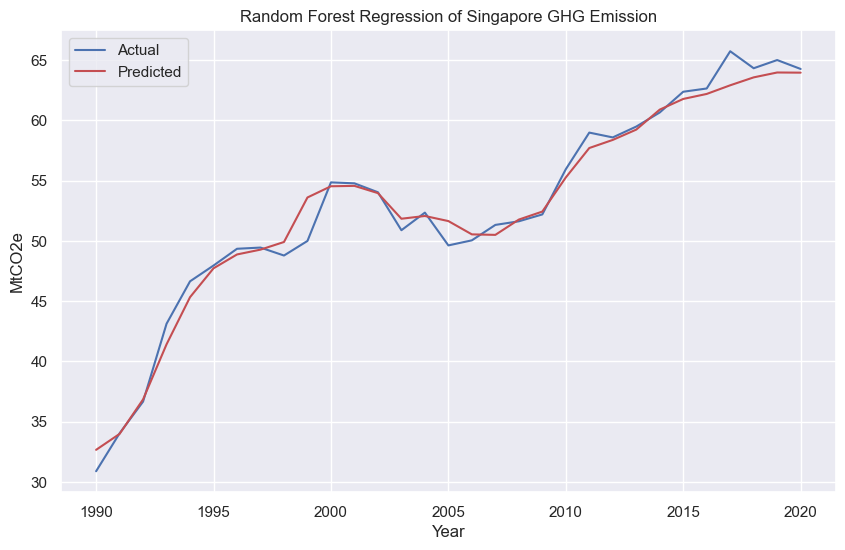

Predicted GHG_emission in 2030: 63.96 MtCO2e
Mean Squared Error (MSE): 1.33
R2 score:  0.98


In [117]:
# Split the data into training and testing sets
X = singapore_total_ghg_t.index.values.reshape(-1, 1)
y = singapore_total_ghg_t['GHG_emission']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state=42)

# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions for the entire data range (1990 to 2020)
X_range = np.arange(1990, 2021).reshape(-1, 1)
y_pred = rf_model.predict(X_range)

# Convert the NumPy arrays to lists
X_test = X_test.flatten().tolist()
y_pred = y_pred.tolist()


# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.plot(X_range, y, 'b', label='Actual')
plt.plot(X_range, y_pred, 'r', label='Predicted')
plt.xlabel('Year')
plt.ylabel('MtCO2e')
# Set the X-axis tick labels


plt.title('Random Forest Regression of Singapore GHG Emission')
plt.legend()
plt.show()

# Make predictions for 2030
X_future = [[2030]]
y_pred = rf_model.predict(X_future)

# Print the predicted value
print("Predicted GHG_emission in 2030:", round(y_pred[0], 2), 'MtCO2e')

y_pred = rf_model.predict(X_range)
# Check Mean Square Error
mse = metrics.mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))

# Check score
r2 = metrics.r2_score(y,y_pred)
print("R2 score: ", round(r2, 2))

# Prediction using Linear Regression Model

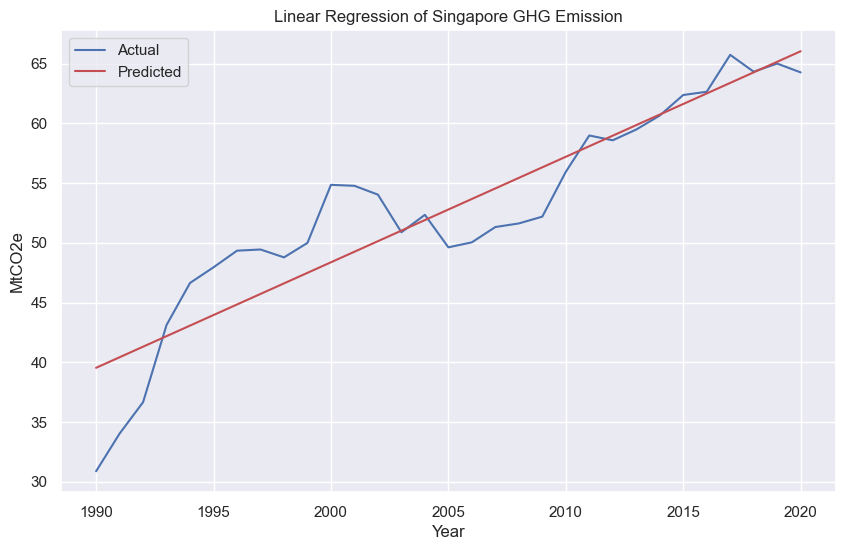

Predicted GHG_emission in 2030: 74.87 MtCO2e
Mean Squared Error (MSE): 12.16
R2 score:  0.84


In [118]:

X = singapore_total_ghg_t.index.values.reshape(-1, 1)
y = singapore_total_ghg_t['GHG_emission']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state=42)

# Create a Random Forest regressor
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions for the entire data range (1990 to 2020)
X_range = np.arange(1990, 2021).reshape(-1, 1)
y_lr_pred = lr_model.predict(X_range)

# Convert the NumPy arrays to lists
X_test = X_test.flatten().tolist()
y_lr_pred = y_lr_pred.tolist()


# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.plot(X_range, y, 'b', label='Actual')
plt.plot(X_range, y_lr_pred, 'r', label='Predicted')
plt.xlabel('Year')
plt.ylabel('MtCO2e')
# Set the X-axis tick labels


plt.title('Linear Regression of Singapore GHG Emission')
plt.legend()
plt.show()

# Make predictions for 2030
X_future = [[2030]]
y_pred = lr_model.predict(X_future)

# Print the predicted value
print("Predicted GHG_emission in 2030:", round(y_pred[0], 2), 'MtCO2e')

y_pred = lr_model.predict(X_range)
# Check Mean Square Error
mse = metrics.mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))

# Check score
r2 = metrics.r2_score(y,y_pred)
print("R2 score: ", round(r2, 2))